In [2]:
# Импорт библиотек
import numpy as np
import tensorflow as tf
import pandas as pd

In [3]:
# Импорт matplotlib

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [9]:
# Импорт обучающей выборки
data = pd.read_csv('monthly-car-sales-in-quebec-1960.csv', sep=';', header=0, parse_dates=[0])


In [10]:
#  Знакомимся с данными
data.head()

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [11]:
#  Знакомимся с данными
data.shape

(108, 2)

In [12]:
#  Знакомимся с данными
data.head()

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


<AxesSubplot:>

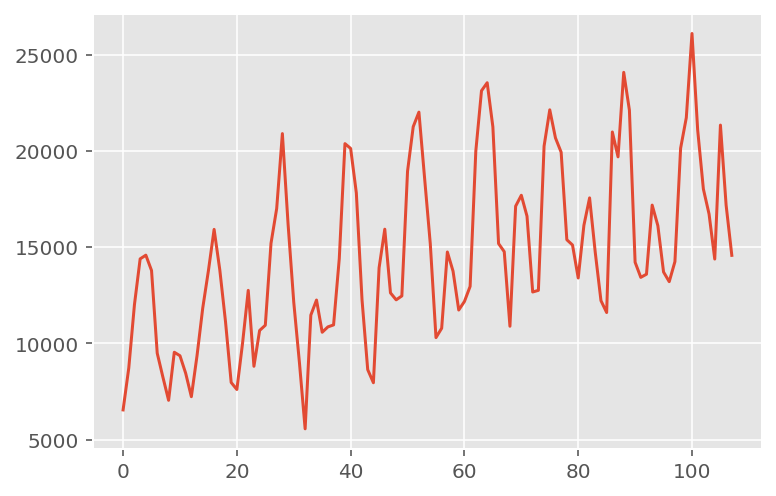

In [13]:
#  График, чтобы ответить на 4 вопроса
data.iloc[:,1].plot()
#1 стационарный ряд 2 выборосов нет 3 сезонка есть 4 тренд положительный

In [14]:
# Преобразуем данные
sales_2 = pd.DataFrame()

for i in range(12,0,-1):
    sales_2['t-'+str(i)] = data.iloc[:,1].shift(i)

sales_2['t'] = data.iloc[:,1].values

print(sales_2.head(13))




      t-12    t-11     t-10      t-9      t-8      t-7      t-6      t-5  \
0      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
5      NaN     NaN      NaN      NaN      NaN      NaN      NaN   6550.0   
6      NaN     NaN      NaN      NaN      NaN      NaN   6550.0   8728.0   
7      NaN     NaN      NaN      NaN      NaN   6550.0   8728.0  12026.0   
8      NaN     NaN      NaN      NaN   6550.0   8728.0  12026.0  14395.0   
9      NaN     NaN      NaN   6550.0   8728.0  12026.0  14395.0  14587.0   
10     NaN     NaN   6550.0   8728.0  12026.0  14395.0  14587.0  13791.0   
11     NaN  6550.0   8728.0  12026.0  14395.0  14587.0  13791.0   9498.0   
12  6550.0  

In [15]:
#  Убираем первые 12 строк делаем пачку по 12 с 13 итоговым значением
sales_4 = sales_2[12:]

sales_4.head(13)

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
12,6550.0,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237
13,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374
14,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837
15,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784
16,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926
17,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926.0,13821
18,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926.0,13821.0,11143
19,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926.0,13821.0,11143.0,7975
20,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926.0,13821.0,11143.0,7975.0,7610
21,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926.0,13821.0,11143.0,7975.0,7610.0,10015


In [16]:
#  предикторы и отклик разделяем
# Отклик - группирующая переменная -  вектор y
y = sales_4['t']
# Предикторы - таблица X
X = sales_4.drop('t', axis=1)

In [17]:
#  Разделяем на обучающую и тестовую выборки
#  Тестовая - последние наблюдения
X_train = X[:91]
y_train = y[:91]
X_test  = X[91:]
y_test  = y[91:]

In [18]:
#  Все хорошо?
print(sales_4.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(96, 13)
(91, 12)
(91,)
(5, 12)
(5,)


In [19]:
#  Все хорошо?
print(X_train.head(5))

       t-12     t-11     t-10      t-9      t-8      t-7     t-6     t-5  \
12   6550.0   8728.0  12026.0  14395.0  14587.0  13791.0  9498.0  8251.0   
13   8728.0  12026.0  14395.0  14587.0  13791.0   9498.0  8251.0  7049.0   
14  12026.0  14395.0  14587.0  13791.0   9498.0   8251.0  7049.0  9545.0   
15  14395.0  14587.0  13791.0   9498.0   8251.0   7049.0  9545.0  9364.0   
16  14587.0  13791.0   9498.0   8251.0   7049.0   9545.0  9364.0  8456.0   

       t-4     t-3      t-2      t-1  
12  7049.0  9545.0   9364.0   8456.0  
13  9545.0  9364.0   8456.0   7237.0  
14  9364.0  8456.0   7237.0   9374.0  
15  8456.0  7237.0   9374.0  11837.0  
16  7237.0  9374.0  11837.0  13784.0  


In [20]:
#  Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [29]:
from keras.models import Sequential
from keras.layers import Dense


In [144]:
#  Обучение нейронной сети 

# Creating a model
model = Sequential()
model.add(Dense(8, input_dim=12, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compiling model
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mean_absolute_percentage_error'])


# Training a model
model.fit(X_train, y_train, epochs=300, batch_size=None)



Epoch 1/300


1/3 [=========>....................] - ETA: 1s - loss: 453565440.0000 - mean_absolute_percentage_error: 135.6919

3/3 [==============================] - 1s 2ms/step - loss: 430844304.0000 - mean_absolute_percentage_error: 131.8758


Epoch 2/300
1/3 [=========>....................] - ETA: 0s - loss: 394939520.0000 - mean_absolute_percentage_error: 123.4207

3/3 [==============================] - 0s 2ms/step - loss: 376822448.0000 - mean_absolute_percentage_error: 121.9355


Epoch 3/300
1/3 [=========>....................] - ETA: 0s - loss: 326768576.0000 - mean_absolute_percentage_error: 114.1824

3/3 [==============================] - 0s 3ms/step - loss: 331415040.0000 - mean_absolute_percentage_error: 113.7689


Epoch 4/300
1/3 [=========>....................] - ETA: 0s - loss: 344618240.0000 - mean_absolute_percentage_error: 109.8924

3/3 [==============================] - 0s 3ms/step - loss: 303983120.0000 - mean_absolute_percentage_error: 107.1137


Epoch 5/300
1/3 [=========>....................] - ETA: 0s - loss: 296320640.0000 - mean_absolute_percentage_error: 100.8707

3/3 [==============================] - 0s 2ms/step - loss: 271154032.0000 - mean_absolute_percentage_error: 99.4231


Epoch 6/300
1/3 [=========>....................] - ETA: 0s - loss: 237048128.0000 - mean_absolute_percentage_error: 96.1377

3/3 [==============================] - 0s 3ms/step - loss: 231273488.0000 - mean_absolute_percentage_error: 93.0888


Epoch 7/300
1/3 [=========>....................] - ETA: 0s - loss: 176672624.0000 - mean_absolute_percentage_error: 83.6914

3/3 [==============================] - 0s 2ms/step - loss: 194367644.0000 - mean_absolute_percentage_error: 84.6922


Epoch 8/300
1/3 [=========>....................] - ETA: 0s - loss: 188690400.0000 - mean_absolute_percentage_error: 81.2806

3/3 [==============================] - 0s 2ms/step - loss: 175047308.0000 - mean_absolute_percentage_error: 78.8337


Epoch 9/300
1/3 [=========>....................] - ETA: 0s - loss: 143157008.0000 - mean_absolute_percentage_error: 70.1727

3/3 [==============================] - 0s 3ms/step - loss: 143506466.0000 - mean_absolute_percentage_error: 71.1026


Epoch 10/300
1/3 [=========>....................] - ETA: 0s - loss: 121644240.0000 - mean_absolute_percentage_error: 67.9128

3/3 [==============================] - 0s 2ms/step - loss: 130995744.0000 - mean_absolute_percentage_error: 67.3769


Epoch 11/300
1/3 [=========>....................] - ETA: 0s - loss: 146955664.0000 - mean_absolute_percentage_error: 65.6538

2/3 [===================>..........] - ETA: 0s - loss: 134936236.0000 - mean_absolute_percentage_error: 63.4047

3/3 [==============================] - 0s 51ms/step - loss: 126541990.0000 - mean_absolute_percentage_error: 62.6202


Epoch 12/300
1/3 [=========>....................] - ETA: 0s - loss: 130823320.0000 - mean_absolute_percentage_error: 62.1994

2/3 [===================>..........] - ETA: 0s - loss: 123122492.0000 - mean_absolute_percentage_error: 61.6544

3/3 [==============================] - 0s 38ms/step - loss: 113839974.0000 - mean_absolute_percentage_error: 59.4221


Epoch 13/300
1/3 [=========>....................] - ETA: 0s - loss: 85008656.0000 - mean_absolute_percentage_error: 54.9723

3/3 [==============================] - 0s 3ms/step - loss: 90578380.0000 - mean_absolute_percentage_error: 53.9591


Epoch 14/300
1/3 [=========>....................] - ETA: 0s - loss: 67899888.0000 - mean_absolute_percentage_error: 48.8922

2/3 [===================>..........] - ETA: 0s - loss: 70359756.0000 - mean_absolute_percentage_error: 49.0334

3/3 [==============================] - 0s 34ms/step - loss: 75783670.0000 - mean_absolute_percentage_error: 49.3858


Epoch 15/300
1/3 [=========>....................] - ETA: 0s - loss: 77787968.0000 - mean_absolute_percentage_error: 47.1005

3/3 [==============================] - 0s 3ms/step - loss: 73903816.0000 - mean_absolute_percentage_error: 46.9545


Epoch 16/300
1/3 [=========>....................] - ETA: 0s - loss: 62919384.0000 - mean_absolute_percentage_error: 41.0791

3/3 [==============================] - 0s 2ms/step - loss: 62454325.0000 - mean_absolute_percentage_error: 42.5465


Epoch 17/300
1/3 [=========>....................] - ETA: 0s - loss: 73556408.0000 - mean_absolute_percentage_error: 46.1734

3/3 [==============================] - 0s 2ms/step - loss: 61915909.0000 - mean_absolute_percentage_error: 42.1860


Epoch 18/300
1/3 [=========>....................] - ETA: 0s - loss: 45232192.0000 - mean_absolute_percentage_error: 33.8831

3/3 [==============================] - 0s 3ms/step - loss: 49140966.0000 - mean_absolute_percentage_error: 37.1848


Epoch 19/300
1/3 [=========>....................] - ETA: 0s - loss: 58777960.0000 - mean_absolute_percentage_error: 40.0409

3/3 [==============================] - 0s 2ms/step - loss: 48582867.0000 - mean_absolute_percentage_error: 36.9305


Epoch 20/300
1/3 [=========>....................] - ETA: 0s - loss: 44155632.0000 - mean_absolute_percentage_error: 37.8204

3/3 [==============================] - 0s 2ms/step - loss: 39792287.0000 - mean_absolute_percentage_error: 34.5650


Epoch 21/300
1/3 [=========>....................] - ETA: 0s - loss: 33988952.0000 - mean_absolute_percentage_error: 31.6268

3/3 [==============================] - 0s 2ms/step - loss: 34763865.0000 - mean_absolute_percentage_error: 31.9384


Epoch 22/300


1/3 [=========>....................] - ETA: 0s - loss: 26071988.0000 - mean_absolute_percentage_error: 31.3561

3/3 [==============================] - 0s 2ms/step - loss: 28485827.5000 - mean_absolute_percentage_error: 30.2230


Epoch 23/300
1/3 [=========>....................] - ETA: 0s - loss: 27607326.0000 - mean_absolute_percentage_error: 25.4420

3/3 [==============================] - 0s 2ms/step - loss: 26142512.5000 - mean_absolute_percentage_error: 27.0309


Epoch 24/300
1/3 [=========>....................] - ETA: 0s - loss: 20360822.0000 - mean_absolute_percentage_error: 30.9545

3/3 [==============================] - 0s 2ms/step - loss: 22851153.5000 - mean_absolute_percentage_error: 28.1902


Epoch 25/300
1/3 [=========>....................] - ETA: 0s - loss: 24602574.0000 - mean_absolute_percentage_error: 25.2996

3/3 [==============================] - 0s 3ms/step - loss: 21887607.5000 - mean_absolute_percentage_error: 25.5839


Epoch 26/300
1/3 [=========>....................] - ETA: 0s - loss: 15710638.0000 - mean_absolute_percentage_error: 19.8665

3/3 [==============================] - 0s 2ms/step - loss: 18176703.5000 - mean_absolute_percentage_error: 23.0607


Epoch 27/300
1/3 [=========>....................] - ETA: 0s - loss: 24604588.0000 - mean_absolute_percentage_error: 30.5498

3/3 [==============================] - 0s 2ms/step - loss: 20266411.0000 - mean_absolute_percentage_error: 26.2781


Epoch 28/300
1/3 [=========>....................] - ETA: 0s - loss: 14376188.0000 - mean_absolute_percentage_error: 21.9883

3/3 [==============================] - 0s 3ms/step - loss: 16337479.0000 - mean_absolute_percentage_error: 23.2743


Epoch 29/300
1/3 [=========>....................] - ETA: 0s - loss: 13612978.0000 - mean_absolute_percentage_error: 19.9156

3/3 [==============================] - 0s 2ms/step - loss: 15499361.2500 - mean_absolute_percentage_error: 22.5631


Epoch 30/300
1/3 [=========>....................] - ETA: 0s - loss: 15797891.0000 - mean_absolute_percentage_error: 26.3373

3/3 [==============================] - 0s 2ms/step - loss: 15694961.7500 - mean_absolute_percentage_error: 24.4526


Epoch 31/300


1/3 [=========>....................] - ETA: 0s - loss: 12333792.0000 - mean_absolute_percentage_error: 19.1819

3/3 [==============================] - 0s 3ms/step - loss: 14844318.5000 - mean_absolute_percentage_error: 22.8380


Epoch 32/300


1/3 [=========>....................] - ETA: 0s - loss: 18662740.0000 - mean_absolute_percentage_error: 29.8341

3/3 [==============================] - 0s 5ms/step - loss: 16494897.7500 - mean_absolute_percentage_error: 25.7686


Epoch 33/300
1/3 [=========>....................] - ETA: 0s - loss: 16770802.0000 - mean_absolute_percentage_error: 22.6825

3/3 [==============================] - 0s 2ms/step - loss: 15614738.5000 - mean_absolute_percentage_error: 23.3693


Epoch 34/300
1/3 [=========>....................] - ETA: 0s - loss: 14028918.0000 - mean_absolute_percentage_error: 19.7716

3/3 [==============================] - 0s 2ms/step - loss: 14111719.5000 - mean_absolute_percentage_error: 21.4799


Epoch 35/300
1/3 [=========>....................] - ETA: 0s - loss: 16114055.0000 - mean_absolute_percentage_error: 25.8407

3/3 [==============================] - ETA: 0s - loss: 15423451.6667 - mean_absolute_percentage_error: 24.4032

3/3 [==============================] - 0s 32ms/step - loss: 15290326.7500 - mean_absolute_percentage_error: 24.2107


Epoch 36/300


1/3 [=========>....................] - ETA: 0s - loss: 16961230.0000 - mean_absolute_percentage_error: 26.7568

3/3 [==============================] - 0s 2ms/step - loss: 15215917.5000 - mean_absolute_percentage_error: 24.1224


Epoch 37/300
1/3 [=========>....................] - ETA: 0s - loss: 15260756.0000 - mean_absolute_percentage_error: 22.4849

3/3 [==============================] - 0s 2ms/step - loss: 14807704.2500 - mean_absolute_percentage_error: 23.0130


Epoch 38/300
1/3 [=========>....................] - ETA: 0s - loss: 13251318.0000 - mean_absolute_percentage_error: 22.1479

3/3 [==============================] - 0s 2ms/step - loss: 14041250.2500 - mean_absolute_percentage_error: 22.7985


Epoch 39/300
1/3 [=========>....................] - ETA: 0s - loss: 11808566.0000 - mean_absolute_percentage_error: 19.9354

3/3 [==============================] - 0s 2ms/step - loss: 13706081.2500 - mean_absolute_percentage_error: 22.5916


Epoch 40/300
1/3 [=========>....................] - ETA: 0s - loss: 14663413.0000 - mean_absolute_percentage_error: 26.9144

3/3 [==============================] - 0s 2ms/step - loss: 14890741.2500 - mean_absolute_percentage_error: 24.6785


Epoch 41/300
1/3 [=========>....................] - ETA: 0s - loss: 15595930.0000 - mean_absolute_percentage_error: 23.3538

3/3 [==============================] - ETA: 0s - loss: 14343072.0000 - mean_absolute_percentage_error: 22.7533

3/3 [==============================] - 0s 30ms/step - loss: 14234531.5000 - mean_absolute_percentage_error: 22.7665


Epoch 42/300


1/3 [=========>....................] - ETA: 0s - loss: 12512278.0000 - mean_absolute_percentage_error: 22.8705

3/3 [==============================] - 0s 3ms/step - loss: 13333860.2500 - mean_absolute_percentage_error: 22.9541


Epoch 43/300
1/3 [=========>....................] - ETA: 0s - loss: 10057311.0000 - mean_absolute_percentage_error: 18.6795

3/3 [==============================] - 0s 2ms/step - loss: 12743084.2500 - mean_absolute_percentage_error: 21.1713


Epoch 44/300


1/3 [=========>....................] - ETA: 0s - loss: 12519883.0000 - mean_absolute_percentage_error: 22.1195

2/3 [===================>..........] - ETA: 0s - loss: 12461347.5000 - mean_absolute_percentage_error: 21.5660

3/3 [==============================] - 0s 49ms/step - loss: 12966762.2500 - mean_absolute_percentage_error: 21.9861


Epoch 45/300
1/3 [=========>....................] - ETA: 0s - loss: 13703164.0000 - mean_absolute_percentage_error: 26.1759

3/3 [==============================] - ETA: 0s - loss: 13173057.0000 - mean_absolute_percentage_error: 23.7881

3/3 [==============================] - 0s 35ms/step - loss: 13219824.7500 - mean_absolute_percentage_error: 23.4156


Epoch 46/300
1/3 [=========>....................] - ETA: 0s - loss: 12447094.0000 - mean_absolute_percentage_error: 20.4460

3/3 [==============================] - 0s 3ms/step - loss: 13275866.7500 - mean_absolute_percentage_error: 21.9478


Epoch 47/300
1/3 [=========>....................] - ETA: 0s - loss: 16045301.0000 - mean_absolute_percentage_error: 24.8956

3/3 [==============================] - 0s 2ms/step - loss: 13647922.7500 - mean_absolute_percentage_error: 22.5866


Epoch 48/300
1/3 [=========>....................] - ETA: 0s - loss: 11030210.0000 - mean_absolute_percentage_error: 21.8469

2/3 [===================>..........] - ETA: 0s - loss: 11349925.0000 - mean_absolute_percentage_error: 21.3230

3/3 [==============================] - 0s 36ms/step - loss: 12145935.0000 - mean_absolute_percentage_error: 21.6424


Epoch 49/300
1/3 [=========>....................] - ETA: 0s - loss: 13122194.0000 - mean_absolute_percentage_error: 23.3504

3/3 [==============================] - 0s 2ms/step - loss: 12946992.0000 - mean_absolute_percentage_error: 22.3274


Epoch 50/300


1/3 [=========>....................] - ETA: 0s - loss: 12215032.0000 - mean_absolute_percentage_error: 20.2814

3/3 [==============================] - 0s 3ms/step - loss: 12459387.0000 - mean_absolute_percentage_error: 21.3187


Epoch 51/300
1/3 [=========>....................] - ETA: 0s - loss: 15455427.0000 - mean_absolute_percentage_error: 25.1628

2/3 [===================>..........] - ETA: 0s - loss: 13637689.5000 - mean_absolute_percentage_error: 23.3409

3/3 [==============================] - 0s 36ms/step - loss: 13109363.2500 - mean_absolute_percentage_error: 22.5245


Epoch 52/300
1/3 [=========>....................] - ETA: 0s - loss: 11907362.0000 - mean_absolute_percentage_error: 24.2178

3/3 [==============================] - 0s 2ms/step - loss: 11889458.0000 - mean_absolute_percentage_error: 22.0821


Epoch 53/300
1/3 [=========>....................] - ETA: 0s - loss: 12207318.0000 - mean_absolute_percentage_error: 20.7356

3/3 [==============================] - 0s 2ms/step - loss: 12404809.0000 - mean_absolute_percentage_error: 21.6570


Epoch 54/300
1/3 [=========>....................] - ETA: 0s - loss: 15208422.0000 - mean_absolute_percentage_error: 25.3371

3/3 [==============================] - 0s 2ms/step - loss: 13219897.7500 - mean_absolute_percentage_error: 22.8919


Epoch 55/300
1/3 [=========>....................] - ETA: 0s - loss: 14355594.0000 - mean_absolute_percentage_error: 20.7957

3/3 [==============================] - 0s 2ms/step - loss: 12518872.2500 - mean_absolute_percentage_error: 20.7918


Epoch 56/300
1/3 [=========>....................] - ETA: 0s - loss: 12763884.0000 - mean_absolute_percentage_error: 19.3588

3/3 [==============================] - 0s 2ms/step - loss: 12570104.0000 - mean_absolute_percentage_error: 21.0937


Epoch 57/300
1/3 [=========>....................] - ETA: 0s - loss: 13989410.0000 - mean_absolute_percentage_error: 27.7263

3/3 [==============================] - 0s 3ms/step - loss: 12485909.5000 - mean_absolute_percentage_error: 23.0672


Epoch 58/300
1/3 [=========>....................] - ETA: 0s - loss: 8454887.0000 - mean_absolute_percentage_error: 18.4998

3/3 [==============================] - 0s 2ms/step - loss: 10687093.2500 - mean_absolute_percentage_error: 19.9262


Epoch 59/300
1/3 [=========>....................] - ETA: 0s - loss: 12834438.0000 - mean_absolute_percentage_error: 19.5086

3/3 [==============================] - 0s 2ms/step - loss: 11693392.0000 - mean_absolute_percentage_error: 20.3775


Epoch 60/300
1/3 [=========>....................] - ETA: 0s - loss: 10155512.0000 - mean_absolute_percentage_error: 22.0162

3/3 [==============================] - 0s 1ms/step - loss: 11282671.0000 - mean_absolute_percentage_error: 21.5745


Epoch 61/300
1/3 [=========>....................] - ETA: 0s - loss: 12188468.0000 - mean_absolute_percentage_error: 22.0859

3/3 [==============================] - 0s 2ms/step - loss: 11609669.0000 - mean_absolute_percentage_error: 21.4019


Epoch 62/300
1/3 [=========>....................] - ETA: 0s - loss: 9283074.0000 - mean_absolute_percentage_error: 16.7420

3/3 [==============================] - 0s 2ms/step - loss: 10467617.7500 - mean_absolute_percentage_error: 19.3998


Epoch 63/300


1/3 [=========>....................] - ETA: 0s - loss: 12596854.0000 - mean_absolute_percentage_error: 20.4236

3/3 [==============================] - 0s 2ms/step - loss: 12003781.7500 - mean_absolute_percentage_error: 20.8911


Epoch 64/300
1/3 [=========>....................] - ETA: 0s - loss: 10296852.0000 - mean_absolute_percentage_error: 19.6323

3/3 [==============================] - 0s 2ms/step - loss: 10970122.7500 - mean_absolute_percentage_error: 20.2530


Epoch 65/300


1/3 [=========>....................] - ETA: 0s - loss: 8941954.0000 - mean_absolute_percentage_error: 19.0182

3/3 [==============================] - 0s 2ms/step - loss: 10291142.2500 - mean_absolute_percentage_error: 20.2322


Epoch 66/300


1/3 [=========>....................] - ETA: 0s - loss: 10072994.0000 - mean_absolute_percentage_error: 21.7007

3/3 [==============================] - 0s 2ms/step - loss: 10759203.0000 - mean_absolute_percentage_error: 20.6551


Epoch 67/300
1/3 [=========>....................] - ETA: 0s - loss: 9581009.0000 - mean_absolute_percentage_error: 19.1271

3/3 [==============================] - 0s 4ms/step - loss: 10208008.7500 - mean_absolute_percentage_error: 19.6447


Epoch 68/300
1/3 [=========>....................] - ETA: 0s - loss: 11001088.0000 - mean_absolute_percentage_error: 22.6831

3/3 [==============================] - 0s 3ms/step - loss: 10612507.2500 - mean_absolute_percentage_error: 21.0576


Epoch 69/300
1/3 [=========>....................] - ETA: 0s - loss: 8613984.0000 - mean_absolute_percentage_error: 16.4423

3/3 [==============================] - 0s 3ms/step - loss: 10068442.7500 - mean_absolute_percentage_error: 19.3065


Epoch 70/300


1/3 [=========>....................] - ETA: 0s - loss: 11578008.0000 - mean_absolute_percentage_error: 21.4813

3/3 [==============================] - 0s 2ms/step - loss: 11196481.7500 - mean_absolute_percentage_error: 21.0183


Epoch 71/300
1/3 [=========>....................] - ETA: 0s - loss: 9089659.0000 - mean_absolute_percentage_error: 18.2127

2/3 [===================>..........] - ETA: 0s - loss: 10062293.5000 - mean_absolute_percentage_error: 19.6978

3/3 [==============================] - 0s 33ms/step - loss: 10324458.2500 - mean_absolute_percentage_error: 20.0067


Epoch 72/300
1/3 [=========>....................] - ETA: 0s - loss: 7387091.0000 - mean_absolute_percentage_error: 14.1764

3/3 [==============================] - 0s 2ms/step - loss: 9283193.2500 - mean_absolute_percentage_error: 17.9137


Epoch 73/300


1/3 [=========>....................] - ETA: 0s - loss: 12064962.0000 - mean_absolute_percentage_error: 22.6492

3/3 [==============================] - 0s 2ms/step - loss: 11028067.5000 - mean_absolute_percentage_error: 21.3388


Epoch 74/300
1/3 [=========>....................] - ETA: 0s - loss: 10499852.0000 - mean_absolute_percentage_error: 18.8923

2/3 [===================>..........] - ETA: 0s - loss: 10036891.0000 - mean_absolute_percentage_error: 19.0386

3/3 [==============================] - 0s 49ms/step - loss: 10178968.0000 - mean_absolute_percentage_error: 19.5699


Epoch 75/300


1/3 [=========>....................] - ETA: 0s - loss: 12599012.0000 - mean_absolute_percentage_error: 23.7580

2/3 [===================>..........] - ETA: 0s - loss: 11668466.5000 - mean_absolute_percentage_error: 22.5053

3/3 [==============================] - 0s 42ms/step - loss: 10956553.2500 - mean_absolute_percentage_error: 21.2784


Epoch 76/300
1/3 [=========>....................] - ETA: 0s - loss: 14398987.0000 - mean_absolute_percentage_error: 25.7360

3/3 [==============================] - 0s 2ms/step - loss: 11235815.2500 - mean_absolute_percentage_error: 21.3842


Epoch 77/300
1/3 [=========>....................] - ETA: 0s - loss: 12036518.0000 - mean_absolute_percentage_error: 23.3331

3/3 [==============================] - 0s 2ms/step - loss: 10800095.5000 - mean_absolute_percentage_error: 21.0730


Epoch 78/300
1/3 [=========>....................] - ETA: 0s - loss: 11526492.0000 - mean_absolute_percentage_error: 17.6435

3/3 [==============================] - 0s 1ms/step - loss: 10480136.5000 - mean_absolute_percentage_error: 19.4063


Epoch 79/300
1/3 [=========>....................] - ETA: 0s - loss: 7857975.5000 - mean_absolute_percentage_error: 17.1300

3/3 [==============================] - 0s 1ms/step - loss: 9489858.8750 - mean_absolute_percentage_error: 18.8111


Epoch 80/300
1/3 [=========>....................] - ETA: 0s - loss: 7889950.0000 - mean_absolute_percentage_error: 16.1230

3/3 [==============================] - 0s 1ms/step - loss: 9400327.5000 - mean_absolute_percentage_error: 18.6253


Epoch 81/300
1/3 [=========>....................] - ETA: 0s - loss: 11685176.0000 - mean_absolute_percentage_error: 19.2709

3/3 [==============================] - ETA: 0s - loss: 10788520.0000 - mean_absolute_percentage_error: 19.8603

3/3 [==============================] - 0s 33ms/step - loss: 10532855.2500 - mean_absolute_percentage_error: 19.8069


Epoch 82/300
1/3 [=========>....................] - ETA: 0s - loss: 9622594.0000 - mean_absolute_percentage_error: 18.4784

3/3 [==============================] - 0s 2ms/step - loss: 9738904.0000 - mean_absolute_percentage_error: 19.2894


Epoch 83/300
1/3 [=========>....................] - ETA: 0s - loss: 7861881.0000 - mean_absolute_percentage_error: 17.9138

3/3 [==============================] - 0s 2ms/step - loss: 8916333.7500 - mean_absolute_percentage_error: 18.7599


Epoch 84/300
1/3 [=========>....................] - ETA: 0s - loss: 10257103.0000 - mean_absolute_percentage_error: 19.4529

3/3 [==============================] - 0s 1ms/step - loss: 9736953.5000 - mean_absolute_percentage_error: 19.5490


Epoch 85/300
1/3 [=========>....................] - ETA: 0s - loss: 11346258.0000 - mean_absolute_percentage_error: 22.2162

3/3 [==============================] - 0s 2ms/step - loss: 10119322.2500 - mean_absolute_percentage_error: 20.1607


Epoch 86/300
1/3 [=========>....................] - ETA: 0s - loss: 8595926.0000 - mean_absolute_percentage_error: 18.2487

3/3 [==============================] - 0s 2ms/step - loss: 9313468.5000 - mean_absolute_percentage_error: 19.0788


Epoch 87/300
1/3 [=========>....................] - ETA: 0s - loss: 11067244.0000 - mean_absolute_percentage_error: 19.4934

3/3 [==============================] - 0s 2ms/step - loss: 9793535.7500 - mean_absolute_percentage_error: 19.0454


Epoch 88/300
1/3 [=========>....................] - ETA: 0s - loss: 9080392.0000 - mean_absolute_percentage_error: 19.3384

3/3 [==============================] - 0s 2ms/step - loss: 9264460.7500 - mean_absolute_percentage_error: 19.3485


Epoch 89/300
1/3 [=========>....................] - ETA: 0s - loss: 7195022.0000 - mean_absolute_percentage_error: 16.5771

3/3 [==============================] - 0s 2ms/step - loss: 8572123.2500 - mean_absolute_percentage_error: 18.1419


Epoch 90/300
1/3 [=========>....................] - ETA: 0s - loss: 10388514.0000 - mean_absolute_percentage_error: 19.8431

3/3 [==============================] - 0s 2ms/step - loss: 9442562.5000 - mean_absolute_percentage_error: 19.2903


Epoch 91/300


1/3 [=========>....................] - ETA: 0s - loss: 11655538.0000 - mean_absolute_percentage_error: 20.5191

3/3 [==============================] - 0s 2ms/step - loss: 9831377.5000 - mean_absolute_percentage_error: 19.3582


Epoch 92/300
1/3 [=========>....................] - ETA: 0s - loss: 9894241.0000 - mean_absolute_percentage_error: 18.4044

2/3 [===================>..........] - ETA: 0s - loss: 9843204.5000 - mean_absolute_percentage_error: 19.3525

3/3 [==============================] - 0s 30ms/step - loss: 9396061.2500 - mean_absolute_percentage_error: 19.1170


Epoch 93/300


1/3 [=========>....................] - ETA: 0s - loss: 11047816.0000 - mean_absolute_percentage_error: 22.5782

3/3 [==============================] - 0s 3ms/step - loss: 9612260.5000 - mean_absolute_percentage_error: 19.9655


Epoch 94/300


1/3 [=========>....................] - ETA: 0s - loss: 8215540.5000 - mean_absolute_percentage_error: 16.3644

3/3 [==============================] - 0s 2ms/step - loss: 8598643.1250 - mean_absolute_percentage_error: 17.7388


Epoch 95/300


1/3 [=========>....................] - ETA: 0s - loss: 9559795.0000 - mean_absolute_percentage_error: 19.0625

3/3 [==============================] - 0s 2ms/step - loss: 8992331.7500 - mean_absolute_percentage_error: 18.6420


Epoch 96/300


1/3 [=========>....................] - ETA: 0s - loss: 11600155.0000 - mean_absolute_percentage_error: 24.9927

3/3 [==============================] - 0s 2ms/step - loss: 9557130.7500 - mean_absolute_percentage_error: 20.4770


Epoch 97/300
1/3 [=========>....................] - ETA: 0s - loss: 7429404.0000 - mean_absolute_percentage_error: 16.2289

3/3 [==============================] - ETA: 0s - loss: 8067698.8333 - mean_absolute_percentage_error: 17.4920

3/3 [==============================] - 0s 30ms/step - loss: 8199127.8750 - mean_absolute_percentage_error: 17.7451


Epoch 98/300


1/3 [=========>....................] - ETA: 0s - loss: 5945600.0000 - mean_absolute_percentage_error: 15.4641

3/3 [==============================] - 0s 4ms/step - loss: 7883696.0000 - mean_absolute_percentage_error: 17.5256


Epoch 99/300


1/3 [=========>....................] - ETA: 0s - loss: 7555113.5000 - mean_absolute_percentage_error: 15.1696

3/3 [==============================] - 0s 7ms/step - loss: 7933582.7500 - mean_absolute_percentage_error: 17.1746


Epoch 100/300
1/3 [=========>....................] - ETA: 0s - loss: 9647668.0000 - mean_absolute_percentage_error: 21.7324

2/3 [===================>..........] - ETA: 0s - loss: 9389523.0000 - mean_absolute_percentage_error: 20.6468

3/3 [==============================] - 0s 36ms/step - loss: 8898662.0000 - mean_absolute_percentage_error: 19.4856


Epoch 101/300


1/3 [=========>....................] - ETA: 0s - loss: 9862704.0000 - mean_absolute_percentage_error: 21.7162

3/3 [==============================] - 0s 3ms/step - loss: 8735241.5000 - mean_absolute_percentage_error: 19.2724


Epoch 102/300
1/3 [=========>....................] - ETA: 0s - loss: 8082428.0000 - mean_absolute_percentage_error: 16.9956

3/3 [==============================] - 0s 2ms/step - loss: 8261178.7500 - mean_absolute_percentage_error: 17.5382


Epoch 103/300
1/3 [=========>....................] - ETA: 0s - loss: 7334535.0000 - mean_absolute_percentage_error: 18.2804

3/3 [==============================] - 0s 2ms/step - loss: 7925651.8750 - mean_absolute_percentage_error: 18.2181


Epoch 104/300
1/3 [=========>....................] - ETA: 0s - loss: 8812092.0000 - mean_absolute_percentage_error: 18.8656

3/3 [==============================] - 0s 3ms/step - loss: 8263663.7500 - mean_absolute_percentage_error: 18.2962


Epoch 105/300
1/3 [=========>....................] - ETA: 0s - loss: 8595762.0000 - mean_absolute_percentage_error: 18.0925

3/3 [==============================] - 0s 2ms/step - loss: 8310470.5000 - mean_absolute_percentage_error: 18.2771


Epoch 106/300


1/3 [=========>....................] - ETA: 0s - loss: 7408026.5000 - mean_absolute_percentage_error: 16.6331

3/3 [==============================] - 0s 2ms/step - loss: 7919408.6250 - mean_absolute_percentage_error: 17.8842


Epoch 107/300
1/3 [=========>....................] - ETA: 0s - loss: 6672396.0000 - mean_absolute_percentage_error: 15.4020

3/3 [==============================] - 0s 2ms/step - loss: 7737021.7500 - mean_absolute_percentage_error: 17.4279


Epoch 108/300
1/3 [=========>....................] - ETA: 0s - loss: 7963967.5000 - mean_absolute_percentage_error: 17.3507

2/3 [===================>..........] - ETA: 0s - loss: 8143171.2500 - mean_absolute_percentage_error: 18.0906

3/3 [==============================] - 0s 30ms/step - loss: 8014625.3750 - mean_absolute_percentage_error: 17.9665


Epoch 109/300
1/3 [=========>....................] - ETA: 0s - loss: 7657877.5000 - mean_absolute_percentage_error: 16.3517

3/3 [==============================] - 0s 2ms/step - loss: 7754346.1250 - mean_absolute_percentage_error: 17.2352


Epoch 110/300
1/3 [=========>....................] - ETA: 0s - loss: 8234744.0000 - mean_absolute_percentage_error: 18.7448

3/3 [==============================] - 0s 1ms/step - loss: 7976104.8750 - mean_absolute_percentage_error: 18.0276


Epoch 111/300
1/3 [=========>....................] - ETA: 0s - loss: 7011971.0000 - mean_absolute_percentage_error: 18.7773

3/3 [==============================] - 0s 2ms/step - loss: 7353170.3750 - mean_absolute_percentage_error: 17.8827


Epoch 112/300
1/3 [=========>....................] - ETA: 0s - loss: 7501305.0000 - mean_absolute_percentage_error: 15.7762

3/3 [==============================] - 0s 2ms/step - loss: 7525053.3750 - mean_absolute_percentage_error: 16.7236


Epoch 113/300
1/3 [=========>....................] - ETA: 0s - loss: 7732239.0000 - mean_absolute_percentage_error: 18.0751

3/3 [==============================] - 0s 2ms/step - loss: 7533089.0000 - mean_absolute_percentage_error: 17.4554


Epoch 114/300
1/3 [=========>....................] - ETA: 0s - loss: 6040866.5000 - mean_absolute_percentage_error: 15.0510

3/3 [==============================] - ETA: 0s - loss: 6747887.6667 - mean_absolute_percentage_error: 16.0004

3/3 [==============================] - 0s 31ms/step - loss: 6941633.8750 - mean_absolute_percentage_error: 16.3602


Epoch 115/300


1/3 [=========>....................] - ETA: 0s - loss: 6582367.5000 - mean_absolute_percentage_error: 16.8158

3/3 [==============================] - 0s 5ms/step - loss: 7104518.3750 - mean_absolute_percentage_error: 17.1608


Epoch 116/300


1/3 [=========>....................] - ETA: 0s - loss: 7089036.5000 - mean_absolute_percentage_error: 15.2295

3/3 [==============================] - 0s 2ms/step - loss: 7472318.8750 - mean_absolute_percentage_error: 17.0366


Epoch 117/300
1/3 [=========>....................] - ETA: 0s - loss: 8902718.0000 - mean_absolute_percentage_error: 21.1137

3/3 [==============================] - 0s 2ms/step - loss: 7904610.7500 - mean_absolute_percentage_error: 18.5721


Epoch 118/300
1/3 [=========>....................] - ETA: 0s - loss: 7249908.0000 - mean_absolute_percentage_error: 17.0698

3/3 [==============================] - 0s 2ms/step - loss: 7167689.3750 - mean_absolute_percentage_error: 16.7356


Epoch 119/300
1/3 [=========>....................] - ETA: 0s - loss: 6466347.5000 - mean_absolute_percentage_error: 16.2269

3/3 [==============================] - ETA: 0s - loss: 6960842.8333 - mean_absolute_percentage_error: 16.6760

3/3 [==============================] - 0s 34ms/step - loss: 7028326.3750 - mean_absolute_percentage_error: 16.7893


Epoch 120/300


1/3 [=========>....................] - ETA: 0s - loss: 6382057.0000 - mean_absolute_percentage_error: 14.7885

3/3 [==============================] - 0s 3ms/step - loss: 6941409.6250 - mean_absolute_percentage_error: 16.5230


Epoch 121/300


1/3 [=========>....................] - ETA: 0s - loss: 5180800.5000 - mean_absolute_percentage_error: 13.2443

3/3 [==============================] - 0s 3ms/step - loss: 6695741.1250 - mean_absolute_percentage_error: 16.2643


Epoch 122/300
1/3 [=========>....................] - ETA: 0s - loss: 7896016.5000 - mean_absolute_percentage_error: 20.7866

2/3 [===================>..........] - ETA: 0s - loss: 7397281.7500 - mean_absolute_percentage_error: 19.0869

3/3 [==============================] - 0s 44ms/step - loss: 7233938.6250 - mean_absolute_percentage_error: 18.0121


Epoch 123/300
1/3 [=========>....................]

 - ETA: 0s - loss: 5375916.5000 - mean_absolute_percentage_error: 13.1352

3/3 [==============================] - 0s 10ms/step - loss: 6641149.3750 - mean_absolute_percentage_error: 16.0228


Epoch 124/300


1/3 [=========>....................] - ETA: 0s - loss: 7636763.0000 - mean_absolute_percentage_error: 17.9312

3/3 [==============================] - 0s 2ms/step - loss: 7389667.3750 - mean_absolute_percentage_error: 17.5686


Epoch 125/300
1/3 [=========>....................] - ETA: 0s - loss: 7535555.5000 - mean_absolute_percentage_error: 17.8967

2/3 [===================>..........] - ETA: 0s - loss: 7107506.7500 - mean_absolute_percentage_error: 17.3270

3/3 [==============================] - 0s 35ms/step - loss: 7007811.6250 - mean_absolute_percentage_error: 17.0360


Epoch 126/300
1/3 [=========>....................] - ETA: 0s - loss: 8217674.5000 - mean_absolute_percentage_error: 18.3428

3/3 [==============================] - 0s 2ms/step - loss: 7154147.3750 - mean_absolute_percentage_error: 17.0128


Epoch 127/300
1/3 [=========>....................] - ETA: 0s - loss: 6685169.0000 - mean_absolute_percentage_error: 16.6523

3/3 [==============================] - 0s 2ms/step - loss: 6939553.5000 - mean_absolute_percentage_error: 16.9542


Epoch 128/300
1/3 [=========>....................] - ETA: 0s - loss: 6391685.5000 - mean_absolute_percentage_error: 15.9602

3/3 [==============================] - 0s 2ms/step - loss: 6730119.6250 - mean_absolute_percentage_error: 16.2463


Epoch 129/300
1/3 [=========>....................] - ETA: 0s - loss: 6014940.5000 - mean_absolute_percentage_error: 15.3620

3/3 [==============================] - 0s 2ms/step - loss: 6495452.3750 - mean_absolute_percentage_error: 16.0277


Epoch 130/300
1/3 [=========>....................] - ETA: 0s - loss: 5166515.0000 - mean_absolute_percentage_error: 14.3975

2/3 [===================>..........] - ETA: 0s - loss: 5819517.5000 - mean_absolute_percentage_error: 15.5403

3/3 [==============================] - 0s 34ms/step - loss: 6242677.0000 - mean_absolute_percentage_error: 16.0126


Epoch 131/300
1/3 [=========>....................] - ETA: 0s - loss: 7264591.5000 - mean_absolute_percentage_error: 17.8863

3/3 [==============================] - 0s 2ms/step - loss: 6764535.1250 - mean_absolute_percentage_error: 16.8508


Epoch 132/300


1/3 [=========>....................] - ETA: 0s - loss: 6131985.0000 - mean_absolute_percentage_error: 14.4238

3/3 [==============================] - 0s 2ms/step - loss: 6453159.3750 - mean_absolute_percentage_error: 15.6075


Epoch 133/300
1/3 [=========>....................] - ETA: 0s - loss: 5639738.5000 - mean_absolute_percentage_error: 15.4425

3/3 [==============================] - 0s 2ms/step - loss: 6228936.8750 - mean_absolute_percentage_error: 15.8849


Epoch 134/300


1/3 [=========>....................] - ETA: 0s - loss: 6368429.0000 - mean_absolute_percentage_error: 17.9016

3/3 [==============================] - 0s 2ms/step - loss: 6542151.5000 - mean_absolute_percentage_error: 16.7438


Epoch 135/300
1/3 [=========>....................] - ETA: 0s - loss: 6653323.0000 - mean_absolute_percentage_error: 18.3169

3/3 [==============================] - 0s 3ms/step - loss: 6450386.7500 - mean_absolute_percentage_error: 16.7595


Epoch 136/300
1/3 [=========>....................] - ETA: 0s - loss: 6745002.0000 - mean_absolute_percentage_error: 17.6033

3/3 [==============================] - 0s 3ms/step - loss: 6374360.7500 - mean_absolute_percentage_error: 16.2628


Epoch 137/300
1/3 [=========>....................] - ETA: 0s - loss: 6752385.0000 - mean_absolute_percentage_error: 14.7865

3/3 [==============================] - 0s 2ms/step - loss: 6591431.2500 - mean_absolute_percentage_error: 15.7574


Epoch 138/300
1/3 [=========>....................] - ETA: 0s - loss: 4621207.5000 - mean_absolute_percentage_error: 13.1600

3/3 [==============================] - 0s 3ms/step - loss: 5826681.6250 - mean_absolute_percentage_error: 15.2896


Epoch 139/300
1/3 [=========>....................] - ETA: 0s - loss: 6219532.0000 - mean_absolute_percentage_error: 13.4032

3/3 [==============================] - 0s 2ms/step - loss: 6244487.0000 - mean_absolute_percentage_error: 15.1086


Epoch 140/300
1/3 [=========>....................] - ETA: 0s - loss: 6229967.0000 - mean_absolute_percentage_error: 16.4296

2/3 [===================>..........] - ETA: 0s - loss: 5971554.0000 - mean_absolute_percentage_error: 16.0192

3/3 [==============================] - 0s 27ms/step - loss: 6093128.2500 - mean_absolute_percentage_error: 15.9266


Epoch 141/300
1/3 [=========>....................] - ETA: 0s - loss: 5545810.0000 - mean_absolute_percentage_error: 14.8937

3/3 [==============================] - 0s 2ms/step - loss: 5979947.2500 - mean_absolute_percentage_error: 15.6731


Epoch 142/300


1/3 [=========>....................] - ETA: 0s - loss: 7161848.0000 - mean_absolute_percentage_error: 17.9684

3/3 [==============================] - 0s 2ms/step - loss: 6531619.0000 - mean_absolute_percentage_error: 16.5349


Epoch 143/300
1/3 [=========>....................] - ETA: 0s - loss: 5161214.0000 - mean_absolute_percentage_error: 12.1144

3/3 [==============================] - 0s 1ms/step - loss: 5795686.5000 - mean_absolute_percentage_error: 14.8383


Epoch 144/300


1/3 [=========>....................] - ETA: 0s - loss: 6692155.0000 - mean_absolute_percentage_error: 15.7609

3/3 [==============================] - 0s 2ms/step - loss: 6259406.8750 - mean_absolute_percentage_error: 15.4537


Epoch 145/300


1/3 [=========>....................] - ETA: 0s - loss: 4966856.0000 - mean_absolute_percentage_error: 12.7277

3/3 [==============================] - 0s 1ms/step - loss: 5774559.8750 - mean_absolute_percentage_error: 14.8841


Epoch 146/300
1/3 [=========>....................] - ETA: 0s - loss: 5065379.5000 - mean_absolute_percentage_error: 13.8070

2/3 [===================>..........] - ETA: 0s - loss: 5356293.7500 - mean_absolute_percentage_error: 14.5771

3/3 [==============================] - 0s 33ms/step - loss: 5657418.6250 - mean_absolute_percentage_error: 15.0565


Epoch 147/300
1/3 [=========>....................] - ETA: 0s - loss: 6753039.0000 - mean_absolute_percentage_error: 17.9267

3/3 [==============================] - 0s 2ms/step - loss: 6122344.6250 - mean_absolute_percentage_error: 16.2046


Epoch 148/300
1/3 [=========>....................] - ETA: 0s - loss: 5358673.5000 - mean_absolute_percentage_error: 15.6997

3/3 [==============================] - 0s 2ms/step - loss: 5675269.3750 - mean_absolute_percentage_error: 15.3244


Epoch 149/300


1/3 [=========>....................] - ETA: 0s - loss: 5723220.0000 - mean_absolute_percentage_error: 17.4149

3/3 [==============================] - 0s 3ms/step - loss: 5648272.5000 - mean_absolute_percentage_error: 15.8579


Epoch 150/300


1/3 [=========>....................] - ETA: 0s - loss: 4805552.0000 - mean_absolute_percentage_error: 13.5387

3/3 [==============================] - 0s 2ms/step - loss: 5310272.7500 - mean_absolute_percentage_error: 14.4917


Epoch 151/300
1/3 [=========>....................] - ETA: 0s - loss: 6656922.5000 - mean_absolute_percentage_error: 18.3212

2/3 [===================>..........] - ETA: 0s - loss: 6652450.7500 - mean_absolute_percentage_error: 17.5065

3/3 [==============================] - 0s 44ms/step - loss: 6199554.6250 - mean_absolute_percentage_error: 16.3575


Epoch 152/300
1/3 [=========>....................] - ETA: 0s - loss: 6886034.0000 - mean_absolute_percentage_error: 17.0876

3/3 [==============================] - ETA: 0s - loss: 6077624.6667 - mean_absolute_percentage_error: 15.6232

3/3 [==============================] - 0s 42ms/step - loss: 5983257.5000 - mean_absolute_percentage_error: 15.5048


Epoch 153/300
1/3 [=========>....................] - ETA: 0s - loss: 6189943.0000 - mean_absolute_percentage_error: 15.0629

3/3 [==============================] - 0s 2ms/step - loss: 5914774.7500 - mean_absolute_percentage_error: 15.2566


Epoch 154/300
1/3 [=========>....................] - ETA: 0s - loss: 5574415.0000 - mean_absolute_percentage_error: 13.3681

3/3 [==============================] - 0s 2ms/step - loss: 5711270.3750 - mean_absolute_percentage_error: 14.6113


Epoch 155/300
1/3 [=========>....................] - ETA: 0s - loss: 6988637.0000 - mean_absolute_percentage_error: 18.0128

3/3 [==============================] - 0s 3ms/step - loss: 6084805.0000 - mean_absolute_percentage_error: 16.1127


Epoch 156/300
1/3 [=========>....................] - ETA: 0s - loss: 6440158.0000 - mean_absolute_percentage_error: 16.0681

3/3 [==============================] - 0s 2ms/step - loss: 5828818.5000 - mean_absolute_percentage_error: 15.3168


Epoch 157/300
1/3 [=========>....................] - ETA: 0s - loss: 5356107.0000 - mean_absolute_percentage_error: 13.7667

2/3 [===================>..........] - ETA: 0s - loss: 5451382.0000 - mean_absolute_percentage_error: 14.0286

3/3 [==============================] - 0s 30ms/step - loss: 5471719.0000 - mean_absolute_percentage_error: 14.4488


Epoch 158/300
1/3 [=========>....................] - ETA: 0s - loss: 5698845.0000 - mean_absolute_percentage_error: 15.0872

3/3 [==============================] - 0s 2ms/step - loss: 5397683.5000 - mean_absolute_percentage_error: 14.5993


Epoch 159/300
1/3 [=========>....................] - ETA: 0s - loss: 5212066.0000 - mean_absolute_percentage_error: 12.5128

3/3 [==============================] - 0s 2ms/step - loss: 5464707.5000 - mean_absolute_percentage_error: 14.1181


Epoch 160/300


1/3 [=========>....................] - ETA: 0s - loss: 5962115.0000 - mean_absolute_percentage_error: 14.7288

3/3 [==============================] - 0s 2ms/step - loss: 5479130.7500 - mean_absolute_percentage_error: 14.4990


Epoch 161/300
1/3 [=========>....................] - ETA: 0s - loss: 5840028.0000 - mean_absolute_percentage_error: 16.0893

3/3 [==============================] - 0s 2ms/step - loss: 5550095.8750 - mean_absolute_percentage_error: 15.2051


Epoch 162/300
1/3 [=========>....................] - ETA: 0s - loss: 4539956.0000 - mean_absolute_percentage_error: 13.2575

3/3 [==============================] - 0s 2ms/step - loss: 5045887.1250 - mean_absolute_percentage_error: 14.3601


Epoch 163/300
1/3 [=========>....................] - ETA: 0s - loss: 4961367.0000 - mean_absolute_percentage_error: 13.1833

3/3 [==============================] - 0s 3ms/step - loss: 5176980.7500 - mean_absolute_percentage_error: 14.1503


Epoch 164/300
1/3 [=========>....................] - ETA: 0s - loss: 5821113.0000 - mean_absolute_percentage_error: 14.8089

3/3 [==============================] - 0s 2ms/step - loss: 5330239.1250 - mean_absolute_percentage_error: 14.4077


Epoch 165/300
1/3 [=========>....................] - ETA: 0s - loss: 6087474.5000 - mean_absolute_percentage_error: 16.8925

3/3 [==============================] - 0s 1ms/step - loss: 5454602.8750 - mean_absolute_percentage_error: 15.1101


Epoch 166/300
1/3 [=========>....................] - ETA: 0s - loss: 5494940.0000 - mean_absolute_percentage_error: 13.3767

3/3 [==============================] - 0s 7ms/step - loss: 5283730.8750 - mean_absolute_percentage_error: 14.1432


Epoch 167/300
1/3 [=========>....................] - ETA: 0s - loss: 5291314.0000 - mean_absolute_percentage_error: 13.4251

3/3 [==============================] - 0s 2ms/step - loss: 5157255.5000 - mean_absolute_percentage_error: 13.8079


Epoch 168/300
1/3 [=========>....................] - ETA: 0s - loss: 4741007.0000 - mean_absolute_percentage_error: 13.7154

3/3 [==============================] - 0s 3ms/step - loss: 4891290.6250 - mean_absolute_percentage_error: 13.8013


Epoch 169/300
1/3 [=========>....................] - ETA: 0s - loss: 5170701.5000 - mean_absolute_percentage_error: 13.6657

3/3 [==============================] - 0s 2ms/step - loss: 4906413.8750 - mean_absolute_percentage_error: 13.5973


Epoch 170/300
1/3 [=========>....................] - ETA: 0s - loss: 5611657.0000 - mean_absolute_percentage_error: 15.3205

3/3 [==============================] - 0s 2ms/step - loss: 5224653.0000 - mean_absolute_percentage_error: 14.2493


Epoch 171/300
1/3 [=========>....................] - ETA: 0s - loss: 3916724.2500 - mean_absolute_percentage_error: 12.6750

3/3 [==============================] - 0s 2ms/step - loss: 4710446.4375 - mean_absolute_percentage_error: 13.6963


Epoch 172/300
1/3 [=========>....................] - ETA: 0s - loss: 5018704.0000 - mean_absolute_percentage_error: 12.4286

3/3 [==============================] - 0s 2ms/step - loss: 4989030.8750 - mean_absolute_percentage_error: 13.4969


Epoch 173/300


1/3 [=========>....................] - ETA: 0s - loss: 4764980.0000 - mean_absolute_percentage_error: 13.6625

3/3 [==============================] - 0s 2ms/step - loss: 4871066.1250 - mean_absolute_percentage_error: 13.9373


Epoch 174/300
1/3 [=========>....................] - ETA: 0s - loss: 4780305.5000 - mean_absolute_percentage_error: 14.2065

3/3 [==============================] - 0s 2ms/step - loss: 4823127.1250 - mean_absolute_percentage_error: 13.9100


Epoch 175/300
1/3 [=========>....................] - ETA: 0s - loss: 5373315.0000 - mean_absolute_percentage_error: 15.9602

3/3 [==============================] - 0s 2ms/step - loss: 4915355.0000 - mean_absolute_percentage_error: 14.5470


Epoch 176/300


1/3 [=========>....................] - ETA: 0s - loss: 5481567.0000 - mean_absolute_percentage_error: 13.4851

3/3 [==============================] - 0s 2ms/step - loss: 4952932.7500 - mean_absolute_percentage_error: 13.5267


Epoch 177/300


1/3 [=========>....................] - ETA: 0s - loss: 5361676.0000 - mean_absolute_percentage_error: 14.4090

3/3 [==============================] - 0s 2ms/step - loss: 4960290.8750 - mean_absolute_percentage_error: 13.9614


Epoch 178/300
1/3 [=========>....................] - ETA: 0s - loss: 4148763.7500 - mean_absolute_percentage_error: 13.8969

3/3 [==============================] - 0s 2ms/step - loss: 4428291.3125 - mean_absolute_percentage_error: 13.4051


Epoch 179/300
1/3 [=========>....................] - ETA: 0s - loss: 3975948.0000 - mean_absolute_percentage_error: 11.4252

2/3 [===================>..........] - ETA: 0s - loss: 4290650.7500 - mean_absolute_percentage_error: 12.0005

3/3 [==============================] - 0s 41ms/step - loss: 4490999.1250 - mean_absolute_percentage_error: 12.7657


Epoch 180/300


1/3 [=========>....................] - ETA: 0s - loss: 3964715.0000 - mean_absolute_percentage_error: 12.4122

3/3 [==============================] - 0s 2ms/step - loss: 4588344.2500 - mean_absolute_percentage_error: 13.5166


Epoch 181/300


1/3 [=========>....................] - ETA: 0s - loss: 4351885.0000 - mean_absolute_percentage_error: 13.3144

3/3 [==============================] - 0s 7ms/step - loss: 4556262.2500 - mean_absolute_percentage_error: 13.4348


Epoch 182/300
1/3 [=========>....................] - ETA: 0s - loss: 4443462.0000 - mean_absolute_percentage_error: 11.5677

3/3 [==============================] - 0s 3ms/step - loss: 4570991.6250 - mean_absolute_percentage_error: 12.9585


Epoch 183/300


1/3 [=========>....................] - ETA: 0s - loss: 4116453.7500 - mean_absolute_percentage_error: 13.3866

3/3 [==============================] - 0s 2ms/step - loss: 4395838.6875 - mean_absolute_percentage_error: 13.3101


Epoch 184/300


1/3 [=========>....................] - ETA: 0s - loss: 4023838.7500 - mean_absolute_percentage_error: 12.4614

3/3 [==============================] - 0s 2ms/step - loss: 4322936.5625 - mean_absolute_percentage_error: 12.7088


Epoch 185/300
1/3 [=========>....................] - ETA: 0s - loss: 5273145.5000 - mean_absolute_percentage_error: 13.4896

2/3 [===================>..........] - ETA: 0s - loss: 4815175.7500 - mean_absolute_percentage_error: 12.7495

3/3 [==============================] - 0s 34ms/step - loss: 4669083.3750 - mean_absolute_percentage_error: 13.0081


Epoch 186/300
1/3 [=========>....................] - ETA: 0s - loss: 4401039.0000 - mean_absolute_percentage_error: 14.0858

3/3 [==============================] - 0s 2ms/step - loss: 4465378.7500 - mean_absolute_percentage_error: 13.3490


Epoch 187/300
1/3 [=========>....................] - ETA: 0s - loss: 4844850.0000 - mean_absolute_percentage_error: 13.9477

3/3 [==============================] - 0s 2ms/step - loss: 4610989.5000 - mean_absolute_percentage_error: 13.5573


Epoch 188/300
1/3 [=========>....................] - ETA: 0s - loss: 4921317.0000 - mean_absolute_percentage_error: 13.4685

3/3 [==============================] - 0s 2ms/step - loss: 4462536.3750 - mean_absolute_percentage_error: 13.0774


Epoch 189/300
1/3 [=========>....................] - ETA: 0s - loss: 4247519.0000 - mean_absolute_percentage_error: 11.7800

3/3 [==============================] - 0s 2ms/step - loss: 4287724.1250 - mean_absolute_percentage_error: 12.4197


Epoch 190/300
1/3 [=========>....................] - ETA: 0s - loss: 3688502.0000 - mean_absolute_percentage_error: 12.8854

2/3 [===================>..........] - ETA: 0s - loss: 4019346.2500 - mean_absolute_percentage_error: 12.6245

3/3 [==============================] - 0s 35ms/step - loss: 4197995.8750 - mean_absolute_percentage_error: 12.7864


Epoch 191/300
1/3 [=========>....................] - ETA: 0s - loss: 3824135.5000 - mean_absolute_percentage_error: 11.6878

3/3 [==============================] - 0s 2ms/step - loss: 4208958.3750 - mean_absolute_percentage_error: 12.3686


Epoch 192/300


1/3 [=========>....................] - ETA: 0s - loss: 3980426.2500 - mean_absolute_percentage_error: 11.8940

3/3 [==============================] - 0s 2ms/step - loss: 4251443.5625 - mean_absolute_percentage_error: 12.7708


Epoch 193/300
1/3 [=========>....................] - ETA: 0s - loss: 4529351.5000 - mean_absolute_percentage_error: 11.8983

3/3 [==============================] - 0s 2ms/step - loss: 4317356.6875 - mean_absolute_percentage_error: 12.2338


Epoch 194/300
1/3 [=========>....................] - ETA: 0s - loss: 4436351.5000 - mean_absolute_percentage_error: 12.1125

3/3 [==============================] - 0s 2ms/step - loss: 4219101.3750 - mean_absolute_percentage_error: 12.3512


Epoch 195/300
1/3 [=========>....................] - ETA: 0s - loss: 3969046.5000 - mean_absolute_percentage_error: 10.9915

3/3 [==============================] - 0s 2ms/step - loss: 4225524.6250 - mean_absolute_percentage_error: 12.3245


Epoch 196/300
1/3 [=========>....................] - ETA: 0s - loss: 5035759.5000 - mean_absolute_percentage_error: 14.7490

3/3 [==============================] - 0s 2ms/step - loss: 4520964.5000 - mean_absolute_percentage_error: 13.5214


Epoch 197/300
1/3 [=========>....................] - ETA: 0s - loss: 4731081.5000 - mean_absolute_percentage_error: 13.6820

3/3 [==============================] - 0s 2ms/step - loss: 4400265.3750 - mean_absolute_percentage_error: 13.0008


Epoch 198/300
1/3 [=========>....................] - ETA: 0s - loss: 5177209.0000 - mean_absolute_percentage_error: 13.9282

3/3 [==============================] - 0s 2ms/step - loss: 4543128.0000 - mean_absolute_percentage_error: 13.0613


Epoch 199/300
1/3 [=========>....................] - ETA: 0s - loss: 3931129.0000 - mean_absolute_percentage_error: 10.5051

3/3 [==============================] - 0s 2ms/step - loss: 3978133.3750 - mean_absolute_percentage_error: 11.6549


Epoch 200/300
1/3 [=========>....................] - ETA: 0s - loss: 4463204.0000 - mean_absolute_percentage_error: 13.0453

3/3 [==============================] - 0s 1ms/step - loss: 4265086.5000 - mean_absolute_percentage_error: 12.6399


Epoch 201/300
1/3 [=========>....................] - ETA: 0s - loss: 3987081.7500 - mean_absolute_percentage_error: 10.4948

3/3 [==============================] - 0s 2ms/step - loss: 4016716.0625 - mean_absolute_percentage_error: 11.9081


Epoch 202/300
1/3 [=========>....................] - ETA: 0s - loss: 4019369.0000 - mean_absolute_percentage_error: 12.5227

3/3 [==============================] - 0s 2ms/step - loss: 4157595.7500 - mean_absolute_percentage_error: 12.7159


Epoch 203/300
1/3 [=========>....................] - ETA: 0s - loss: 4424966.0000 - mean_absolute_percentage_error: 12.7331

3/3 [==============================] - ETA: 0s - loss: 4104983.8333 - mean_absolute_percentage_error: 12.3259

3/3 [==============================] - 0s 32ms/step - loss: 4092223.7500 - mean_absolute_percentage_error: 12.3432


Epoch 204/300
1/3 [=========>....................] - ETA: 0s - loss: 3708554.0000 - mean_absolute_percentage_error: 10.6001

3/3 [==============================] - 0s 2ms/step - loss: 4020394.5000 - mean_absolute_percentage_error: 12.0234


Epoch 205/300


1/3 [=========>....................] - ETA: 0s - loss: 4974076.5000 - mean_absolute_percentage_error: 12.5753

2/3 [===================>..........] - ETA: 0s - loss: 4399999.6250 - mean_absolute_percentage_error: 11.9656

3/3 [==============================] - 0s 43ms/step - loss: 4204907.0625 - mean_absolute_percentage_error: 12.1341


Epoch 206/300
1/3 [=========>....................] - ETA: 0s - loss: 3736752.5000 - mean_absolute_percentage_error: 11.5529

3/3 [==============================] - 0s 2ms/step - loss: 3941741.9375 - mean_absolute_percentage_error: 12.2300


Epoch 207/300


1/3 [=========>....................] - ETA: 0s - loss: 3794715.2500 - mean_absolute_percentage_error: 11.6102

3/3 [==============================] - ETA: 0s - loss: 3853836.5000 - mean_absolute_percentage_error: 11.6084

3/3 [==============================] - 0s 35ms/step - loss: 3885060.4375 - mean_absolute_percentage_error: 11.7731


Epoch 208/300


1/3 [=========>....................] - ETA: 0s - loss: 3817049.0000 - mean_absolute_percentage_error: 11.9379

3/3 [==============================] - 0s 2ms/step - loss: 3817451.6250 - mean_absolute_percentage_error: 11.9166


Epoch 209/300
1/3 [=========>....................] - ETA: 0s - loss: 2608404.5000 - mean_absolute_percentage_error: 10.9021

3/3 [==============================] - 0s 2ms/step - loss: 3528077.5625 - mean_absolute_percentage_error: 11.8073


Epoch 210/300
1/3 [=========>....................] - ETA: 0s - loss: 4277820.0000 - mean_absolute_percentage_error: 12.0730

3/3 [==============================] - ETA: 0s - loss: 3949508.6667 - mean_absolute_percentage_error: 11.6573

3/3 [==============================] - 0s 38ms/step - loss: 3938861.1875 - mean_absolute_percentage_error: 11.7778


Epoch 211/300


1/3 [=========>....................] - ETA: 0s - loss: 3226676.5000 - mean_absolute_percentage_error: 12.4107

3/3 [==============================] - 0s 3ms/step - loss: 3760393.4375 - mean_absolute_percentage_error: 12.3709


Epoch 212/300
1/3 [=========>....................] - ETA: 0s - loss: 2710410.0000 - mean_absolute_percentage_error: 9.8148

3/3 [==============================] - 0s 2ms/step - loss: 3575747.0625 - mean_absolute_percentage_error: 11.3917


Epoch 213/300
1/3 [=========>....................] - ETA: 0s - loss: 3641252.5000 - mean_absolute_percentage_error: 11.4781

3/3 [==============================] - 0s 4ms/step - loss: 3821156.4375 - mean_absolute_percentage_error: 12.0554


Epoch 214/300
1/3 [=========>....................] - ETA: 0s - loss: 4938523.0000 - mean_absolute_percentage_error: 13.7344

3/3 [==============================] - 0s 2ms/step - loss: 4152978.7500 - mean_absolute_percentage_error: 12.3472


Epoch 215/300
1/3 [=========>....................] - ETA: 0s - loss: 4063109.7500 - mean_absolute_percentage_error: 11.8780

3/3 [==============================] - ETA: 0s - loss: 4018635.4167 - mean_absolute_percentage_error: 12.3151

3/3 [==============================] - 0s 31ms/step - loss: 3965866.5625 - mean_absolute_percentage_error: 12.2214


Epoch 216/300
1/3 [=========>....................] - ETA: 0s - loss: 4719499.0000 - mean_absolute_percentage_error: 11.5363

3/3 [==============================] - 0s 2ms/step - loss: 4087193.5000 - mean_absolute_percentage_error: 11.8622


Epoch 217/300
1/3 [=========>....................] - ETA: 0s - loss: 4186194.5000 - mean_absolute_percentage_error: 12.8246

3/3 [==============================] - 0s 2ms/step - loss: 3881364.1250 - mean_absolute_percentage_error: 12.2843


Epoch 218/300


1/3 [=========>....................] - ETA: 0s - loss: 2695930.2500 - mean_absolute_percentage_error: 9.6649

3/3 [==============================] - 0s 2ms/step - loss: 3349114.4375 - mean_absolute_percentage_error: 11.1691


Epoch 219/300
1/3 [=========>....................] - ETA: 0s - loss: 3101445.0000 - mean_absolute_percentage_error: 11.5661

3/3 [==============================] - 0s 2ms/step - loss: 3615349.6250 - mean_absolute_percentage_error: 11.9116


Epoch 220/300
1/3 [=========>....................] - ETA: 0s - loss: 4024451.2500 - mean_absolute_percentage_error: 11.2586

3/3 [==============================] - 0s 2ms/step - loss: 3817477.3125 - mean_absolute_percentage_error: 11.7508


Epoch 221/300
1/3 [=========>....................] - ETA: 0s - loss: 3808536.5000 - mean_absolute_percentage_error: 11.6346

3/3 [==============================] - 0s 2ms/step - loss: 3695439.4375 - mean_absolute_percentage_error: 11.6175


Epoch 222/300


1/3 [=========>....................] - ETA: 0s - loss: 3439759.2500 - mean_absolute_percentage_error: 11.0590

3/3 [==============================] - 0s 2ms/step - loss: 3607632.4375 - mean_absolute_percentage_error: 11.5922


Epoch 223/300
1/3 [=========>....................] - ETA: 0s - loss: 4179082.0000 - mean_absolute_percentage_error: 12.7648

3/3 [==============================] - 0s 2ms/step - loss: 3906717.5000 - mean_absolute_percentage_error: 12.1481


Epoch 224/300
1/3 [=========>....................] - ETA: 0s - loss: 4257587.5000 - mean_absolute_percentage_error: 12.7414

3/3 [==============================] - 0s 3ms/step - loss: 3797635.3125 - mean_absolute_percentage_error: 11.9164


Epoch 225/300
1/3 [=========>....................] - ETA: 0s - loss: 2256015.2500 - mean_absolute_percentage_error: 9.5829

3/3 [==============================] - 0s 3ms/step - loss: 3292245.4375 - mean_absolute_percentage_error: 11.0914


Epoch 226/300
1/3 [=========>....................] - ETA: 0s - loss: 3936790.5000 - mean_absolute_percentage_error: 11.2173

3/3 [==============================] - 0s 22ms/step - loss: 3756730.8125 - mean_absolute_percentage_error: 11.5857


Epoch 227/300


1/3 [=========>....................] - ETA: 0s - loss: 3760999.0000 - mean_absolute_percentage_error: 10.7605

3/3 [==============================] - 0s 2ms/step - loss: 3674334.3125 - mean_absolute_percentage_error: 11.3403


Epoch 228/300
1/3 [=========>....................] - ETA: 0s - loss: 4245659.0000 - mean_absolute_percentage_error: 13.8770

3/3 [==============================] - 0s 2ms/step - loss: 3813514.1250 - mean_absolute_percentage_error: 12.2967


Epoch 229/300
1/3 [=========>....................] - ETA: 0s - loss: 2809528.7500 - mean_absolute_percentage_error: 9.8093

3/3 [==============================] - 0s 4ms/step - loss: 3342226.3125 - mean_absolute_percentage_error: 10.9735


Epoch 230/300


1/3 [=========>....................] - ETA: 0s - loss: 3888191.7500 - mean_absolute_percentage_error: 10.6872

2/3 [===================>..........] - ETA: 0s - loss: 3706112.0000 - mean_absolute_percentage_error: 11.2959

3/3 [==============================] - 0s 39ms/step - loss: 3622481.2500 - mean_absolute_percentage_error: 11.3508


Epoch 231/300


1/3 [=========>....................] - ETA: 0s - loss: 3169016.5000 - mean_absolute_percentage_error: 10.0663

3/3 [==============================] - 0s 6ms/step - loss: 3339430.8750 - mean_absolute_percentage_error: 10.8642


Epoch 232/300
1/3 [=========>....................]

 - ETA: 0s - loss: 3315727.5000 - mean_absolute_percentage_error: 10.2417

2/3 [===================>..........] - ETA: 0s - loss: 3507415.0000 - mean_absolute_percentage_error: 11.1753

3/3 [==============================] - 0s 35ms/step - loss: 3506548.5000 - mean_absolute_percentage_error: 11.2644


Epoch 233/300


1/3 [=========>....................] - ETA: 0s - loss: 3659213.2500 - mean_absolute_percentage_error: 12.4922

3/3 [==============================] - 0s 2ms/step - loss: 3564393.4375 - mean_absolute_percentage_error: 11.7460


Epoch 234/300
1/3 [=========>....................] - ETA: 0s - loss: 3813720.2500 - mean_absolute_percentage_error: 11.6840



3/3 [==============================] - ETA: 0s - loss: 3599665.9167 - mean_absolute_percentage_error: 11.3801

3/3 [==============================] - 0s 46ms/step - loss: 3569239.6250 - mean_absolute_percentage_error: 11.3587


Epoch 235/300


1/3 [=========>....................] - ETA: 0s - loss: 4139274.0000 - mean_absolute_percentage_error: 13.0093

3/3 [==============================] - 0s 3ms/step - loss: 3662836.0000 - mean_absolute_percentage_error: 11.8058


Epoch 236/300


1/3 [=========>....................] - ETA: 0s - loss: 4088768.0000 - mean_absolute_percentage_error: 12.5673

3/3 [==============================] - 0s 3ms/step - loss: 3693367.5625 - mean_absolute_percentage_error: 11.6164


Epoch 237/300
1/3 [=========>....................] - ETA: 0s - loss: 4072082.2500 - mean_absolute_percentage_error: 13.2364

3/3 [==============================] - 0s 3ms/step - loss: 3637408.8125 - mean_absolute_percentage_error: 11.9127


Epoch 238/300


1/3 [=========>....................] - ETA: 0s - loss: 3925777.2500 - mean_absolute_percentage_error: 11.8180

3/3 [==============================] - 0s 4ms/step - loss: 3627058.5625 - mean_absolute_percentage_error: 11.5428


Epoch 239/300
1/3 [=========>....................] - ETA: 0s - loss: 3496774.5000 - mean_absolute_percentage_error: 9.7416

3/3 [==============================] - 0s 3ms/step - loss: 3482904.0625 - mean_absolute_percentage_error: 10.9310


Epoch 240/300
1/3 [=========>....................] - ETA: 0s - loss: 3248622.0000 - mean_absolute_percentage_error: 10.5275

3/3 [==============================] - 0s 3ms/step - loss: 3438269.6250 - mean_absolute_percentage_error: 11.0757


Epoch 241/300
1/3 [=========>....................] - ETA: 0s - loss: 2245441.5000 - mean_absolute_percentage_error: 10.0543

3/3 [==============================] - 0s 2ms/step - loss: 3057686.0000 - mean_absolute_percentage_error: 10.8067


Epoch 242/300
1/3 [=========>....................] - ETA: 0s - loss: 4304002.0000 - mean_absolute_percentage_error: 12.8368

3/3 [==============================] - 0s 3ms/step - loss: 3742944.1250 - mean_absolute_percentage_error: 11.8047


Epoch 243/300
1/3 [=========>....................] - ETA: 0s - loss: 2675285.5000 - mean_absolute_percentage_error: 10.5824

3/3 [==============================] - 0s 21ms/step - loss: 3091166.0625 - mean_absolute_percentage_error: 10.9886


Epoch 244/300
1/3 [=========>....................] - ETA: 0s - loss: 3784130.0000 - mean_absolute_percentage_error: 12.0441

3/3 [==============================] - 0s 2ms/step - loss: 3486697.8125 - mean_absolute_percentage_error: 11.3406


Epoch 245/300
1/3 [=========>....................] - ETA: 0s - loss: 4613146.0000 - mean_absolute_percentage_error: 13.3354

3/3 [==============================] - 0s 2ms/step - loss: 3673287.7500 - mean_absolute_percentage_error: 11.5580


Epoch 246/300


1/3 [=========>....................] - ETA: 0s - loss: 3473024.5000 - mean_absolute_percentage_error: 11.0001

3/3 [==============================] - 0s 2ms/step - loss: 3435890.8750 - mean_absolute_percentage_error: 11.1424


Epoch 247/300


1/3 [=========>....................] - ETA: 0s - loss: 2882771.5000 - mean_absolute_percentage_error: 9.5863

3/3 [==============================] - 0s 2ms/step - loss: 3222234.9375 - mean_absolute_percentage_error: 10.6423


Epoch 248/300
1/3 [=========>....................] - ETA: 0s - loss: 3213591.0000 - mean_absolute_percentage_error: 10.1516

3/3 [==============================] - 0s 3ms/step - loss: 3219894.5625 - mean_absolute_percentage_error: 10.5261


Epoch 249/300
1/3 [=========>....................] - ETA: 0s - loss: 2939366.2500 - mean_absolute_percentage_error: 9.8595

2/3 [===================>..........] - ETA: 0s - loss: 2757008.8750 - mean_absolute_percentage_error: 9.4391

3/3 [==============================] - 0s 28ms/step - loss: 3030362.6875 - mean_absolute_percentage_error: 10.1848


Epoch 250/300


1/3 [=========>....................] - ETA: 0s - loss: 3044823.0000 - mean_absolute_percentage_error: 11.2607

3/3 [==============================] - 0s 2ms/step - loss: 3149581.7500 - mean_absolute_percentage_error: 10.9839


Epoch 251/300
1/3 [=========>....................] - ETA: 0s - loss: 3106939.0000 - mean_absolute_percentage_error: 10.7511

3/3 [==============================] - 0s 2ms/step - loss: 3303997.6250 - mean_absolute_percentage_error: 11.0355


Epoch 252/300
1/3 [=========>....................] - ETA: 0s - loss: 3162885.0000 - mean_absolute_percentage_error: 11.0380

3/3 [==============================] - 0s 2ms/step - loss: 3183953.5000 - mean_absolute_percentage_error: 10.9804


Epoch 253/300
1/3 [=========>....................] - ETA: 0s - loss: 3516514.0000 - mean_absolute_percentage_error: 12.4508

3/3 [==============================] - 0s 7ms/step - loss: 3298824.7500 - mean_absolute_percentage_error: 11.2125


Epoch 254/300


1/3 [=========>....................] - ETA: 0s - loss: 4262778.0000 - mean_absolute_percentage_error: 12.3219

3/3 [==============================] - 0s 23ms/step - loss: 3550903.3750 - mean_absolute_percentage_error: 11.3182


Epoch 255/300


1/3 [=========>....................] - ETA: 0s - loss: 4365155.0000 - mean_absolute_percentage_error: 13.3397

3/3 [==============================] - 0s 2ms/step - loss: 3592286.0625 - mean_absolute_percentage_error: 11.5514


Epoch 256/300


1/3 [=========>....................] - ETA: 0s - loss: 3112441.5000 - mean_absolute_percentage_error: 11.7270

3/3 [==============================] - 0s 2ms/step - loss: 3164884.0000 - mean_absolute_percentage_error: 11.0048


Epoch 257/300


1/3 [=========>....................] - ETA: 0s - loss: 2887307.5000 - mean_absolute_percentage_error: 10.0357

3/3 [==============================] - ETA: 0s - loss: 3002055.4167 - mean_absolute_percentage_error: 10.1190

3/3 [==============================] - 0s 43ms/step - loss: 3051161.2500 - mean_absolute_percentage_error: 10.2667


Epoch 258/300
1/3 [=========>....................] - ETA: 0s - loss: 3038453.0000 - mean_absolute_percentage_error: 10.4737

3/3 [==============================] - 0s 2ms/step - loss: 3144993.0000 - mean_absolute_percentage_error: 10.7114


Epoch 259/300
1/3 [=========>....................] - ETA: 0s - loss: 2401727.5000 - mean_absolute_percentage_error: 9.4453

3/3 [==============================] - 0s 2ms/step - loss: 2925740.6250 - mean_absolute_percentage_error: 10.1494


Epoch 260/300
1/3 [=========>....................] - ETA: 0s - loss: 3299342.5000 - mean_absolute_percentage_error: 12.4404

3/3 [==============================] - ETA: 0s - loss: 3358183.7500 - mean_absolute_percentage_error: 11.5390

3/3 [==============================] - 0s 42ms/step - loss: 3310761.8750 - mean_absolute_percentage_error: 11.3138


Epoch 261/300
1/3 [=========>....................] - ETA: 0s - loss: 3074895.0000 - mean_absolute_percentage_error: 11.2660

3/3 [==============================] - 0s 2ms/step - loss: 3233882.1250 - mean_absolute_percentage_error: 10.9475


Epoch 262/300
1/3 [=========>....................] - ETA: 0s - loss: 3155998.0000 - mean_absolute_percentage_error: 9.6406

3/3 [==============================] - 0s 2ms/step - loss: 3180214.3750 - mean_absolute_percentage_error: 10.4198


Epoch 263/300
1/3 [=========>....................] - ETA: 0s - loss: 4073932.0000 - mean_absolute_percentage_error: 11.5388

2/3 [===================>..........] - ETA: 0s - loss: 3748266.1250 - mean_absolute_percentage_error: 11.0378

3/3 [==============================] - 0s 29ms/step - loss: 3445653.8125 - mean_absolute_percentage_error: 10.8038


Epoch 264/300


1/3 [=========>....................] - ETA: 0s - loss: 2645802.7500 - mean_absolute_percentage_error: 10.1920

3/3 [==============================] - 0s 4ms/step - loss: 2913791.8125 - mean_absolute_percentage_error: 10.2293


Epoch 265/300
1/3 [=========>....................] - ETA: 0s - loss: 4223122.5000 - mean_absolute_percentage_error: 12.0325

3/3 [==============================] - 0s 3ms/step - loss: 3494071.6250 - mean_absolute_percentage_error: 11.1746


Epoch 266/300
1/3 [=========>....................] - ETA: 0s - loss: 3243940.7500 - mean_absolute_percentage_error: 10.0561

3/3 [==============================] - 0s 28ms/step - loss: 3186538.3125 - mean_absolute_percentage_error: 10.2926


Epoch 267/300
1/3 [=========>....................] - ETA: 0s - loss: 3465763.0000 - mean_absolute_percentage_error: 11.8154

3/3 [==============================] - 0s 2ms/step - loss: 3202717.3750 - mean_absolute_percentage_error: 10.8889


Epoch 268/300
1/3 [=========>....................] - ETA: 0s - loss: 3600451.0000 - mean_absolute_percentage_error: 10.6615

3/3 [==============================] - 0s 2ms/step - loss: 3258965.3750 - mean_absolute_percentage_error: 10.4861


Epoch 269/300
1/3 [=========>....................] - ETA: 0s - loss: 2858869.2500 - mean_absolute_percentage_error: 10.5972

3/3 [==============================] - 0s 2ms/step - loss: 2927280.9375 - mean_absolute_percentage_error: 10.3594


Epoch 270/300
1/3 [=========>....................] - ETA: 0s - loss: 3940623.0000 - mean_absolute_percentage_error: 13.1688

3/3 [==============================] - 0s 2ms/step - loss: 3379863.9375 - mean_absolute_percentage_error: 11.2466


Epoch 271/300
1/3 [=========>....................] - ETA: 0s - loss: 3500145.5000 - mean_absolute_percentage_error: 11.8673

3/3 [==============================] - 0s 2ms/step - loss: 3296073.7500 - mean_absolute_percentage_error: 10.9860


Epoch 272/300
1/3 [=========>....................] - ETA: 0s - loss: 3362539.0000 - mean_absolute_percentage_error: 11.5232

3/3 [==============================] - ETA: 0s - loss: 3086470.7500 - mean_absolute_percentage_error: 10.7564

3/3 [==============================] - 0s 30ms/step - loss: 3082101.2500 - mean_absolute_percentage_error: 10.6637


Epoch 273/300
1/3 [=========>....................] - ETA: 0s - loss: 3095889.5000 - mean_absolute_percentage_error: 8.9422

3/3 [==============================] - 0s 3ms/step - loss: 3022821.2500 - mean_absolute_percentage_error: 9.7495


Epoch 274/300
1/3 [=========>....................] - ETA: 0s - loss: 3848085.5000 - mean_absolute_percentage_error: 11.6611

3/3 [==============================] - 0s 3ms/step - loss: 3179717.0000 - mean_absolute_percentage_error: 10.4412


Epoch 275/300


1/3 [=========>....................] - ETA: 0s - loss: 2757709.5000 - mean_absolute_percentage_error: 9.3468

3/3 [==============================] - 0s 6ms/step - loss: 2899274.6875 - mean_absolute_percentage_error: 9.7847


Epoch 276/300
1/3 [=========>....................] - ETA: 0s - loss: 2760052.5000 - mean_absolute_percentage_error: 9.1096

3/3 [==============================] - 0s 5ms/step - loss: 3037570.0625 - mean_absolute_percentage_error: 10.0431


Epoch 277/300
1/3 [=========>....................] - ETA: 0s - loss: 2100283.7500 - mean_absolute_percentage_error: 8.8210

3/3 [==============================] - 0s 16ms/step - loss: 2742212.6875 - mean_absolute_percentage_error: 9.8013


Epoch 278/300


1/3 [=========>....................] - ETA: 0s - loss: 2230833.0000 - mean_absolute_percentage_error: 8.9478

3/3 [==============================] - 0s 2ms/step - loss: 2700036.7500 - mean_absolute_percentage_error: 9.7417


Epoch 279/300
1/3 [=========>....................] - ETA: 0s - loss: 2370462.5000 - mean_absolute_percentage_error: 9.0138

3/3 [==============================] - 0s 2ms/step - loss: 2853958.0000 - mean_absolute_percentage_error: 10.0144


Epoch 280/300
1/3 [=========>....................] - ETA: 0s - loss: 3219072.5000 - mean_absolute_percentage_error: 10.4867

3/3 [==============================] - 0s 2ms/step - loss: 3049484.2500 - mean_absolute_percentage_error: 10.3076


Epoch 281/300
1/3 [=========>....................] - ETA: 0s - loss: 3245336.2500 - mean_absolute_percentage_error: 10.9763

3/3 [==============================] - 0s 2ms/step - loss: 3178834.1875 - mean_absolute_percentage_error: 10.6347


Epoch 282/300


1/3 [=========>....................] - ETA: 0s - loss: 3498011.0000 - mean_absolute_percentage_error: 9.9958

3/3 [==============================] - ETA: 0s - loss: 3197629.1667 - mean_absolute_percentage_error: 10.0338

3/3 [==============================] - 0s 29ms/step - loss: 3153775.8125 - mean_absolute_percentage_error: 10.0898


Epoch 283/300
1/3 [=========>....................] - ETA: 0s - loss: 3505552.5000 - mean_absolute_percentage_error: 11.0627

3/3 [==============================] - 0s 2ms/step - loss: 3183265.2500 - mean_absolute_percentage_error: 10.3821


Epoch 284/300
1/3 [=========>....................] - ETA: 0s - loss: 3998571.2500 - mean_absolute_percentage_error: 12.2731

3/3 [==============================] - 0s 2ms/step - loss: 3310541.4375 - mean_absolute_percentage_error: 10.8311


Epoch 285/300
1/3 [=========>....................] - ETA: 0s - loss: 2769921.7500 - mean_absolute_percentage_error: 8.4168

3/3 [==============================] - 0s 2ms/step - loss: 2919002.6875 - mean_absolute_percentage_error: 9.4476


Epoch 286/300
1/3 [=========>....................] - ETA: 0s - loss: 3189843.5000 - mean_absolute_percentage_error: 9.8951

3/3 [==============================] - 0s 2ms/step - loss: 3069564.7500 - mean_absolute_percentage_error: 10.0437


Epoch 287/300
1/3 [=========>....................] - ETA: 0s - loss: 2810850.7500 - mean_absolute_percentage_error: 9.6720

3/3 [==============================] - 0s 3ms/step - loss: 3041839.3750 - mean_absolute_percentage_error: 10.1094


Epoch 288/300


1/3 [=========>....................] - ETA: 0s - loss: 2731321.0000 - mean_absolute_percentage_error: 10.8635

2/3 [===================>..........] - ETA: 0s - loss: 2903210.0000 - mean_absolute_percentage_error: 10.8393

3/3 [==============================] - 0s 31ms/step - loss: 2939260.7500 - mean_absolute_percentage_error: 10.4949


Epoch 289/300
1/3 [=========>....................] - ETA: 0s - loss: 1801814.6250 - mean_absolute_percentage_error: 7.2586

3/3 [==============================] - 0s 2ms/step - loss: 2537972.1562 - mean_absolute_percentage_error: 9.3045


Epoch 290/300


1/3 [=========>....................] - ETA: 0s - loss: 2514994.7500 - mean_absolute_percentage_error: 8.6152

3/3 [==============================] - 0s 2ms/step - loss: 2818855.1875 - mean_absolute_percentage_error: 9.6929


Epoch 291/300
1/3 [=========>....................] - ETA: 0s - loss: 2468729.0000 - mean_absolute_percentage_error: 9.9756

3/3 [==============================] - ETA: 0s - loss: 2825626.7500 - mean_absolute_percentage_error: 10.0955

3/3 [==============================] - 0s 40ms/step - loss: 2858460.9375 - mean_absolute_percentage_error: 10.0989


Epoch 292/300
1/3 [=========>....................] - ETA: 0s - loss: 2775427.5000 - mean_absolute_percentage_error: 9.5638

3/3 [==============================] - 0s 2ms/step - loss: 2862428.9375 - mean_absolute_percentage_error: 9.8083


Epoch 293/300
1/3 [=========>....................] - ETA: 0s - loss: 2183128.2500 - mean_absolute_percentage_error: 8.9332

3/3 [==============================] - 0s 1ms/step - loss: 2729292.9375 - mean_absolute_percentage_error: 9.6448


Epoch 294/300


1/3 [=========>....................] - ETA: 0s - loss: 2699858.5000 - mean_absolute_percentage_error: 9.7758

3/3 [==============================] - 0s 5ms/step - loss: 2854248.7500 - mean_absolute_percentage_error: 9.9487


Epoch 295/300
1/3 [=========>....................] - ETA: 0s - loss: 3149383.2500 - mean_absolute_percentage_error: 10.7152

2/3 [===================>..........] - ETA: 0s - loss: 3079941.7500 - mean_absolute_percentage_error: 10.5329

3/3 [==============================] - 0s 37ms/step - loss: 3008389.1250 - mean_absolute_percentage_error: 10.3061


Epoch 296/300
1/3 [=========>....................] - ETA: 0s - loss: 2922592.5000 - mean_absolute_percentage_error: 9.7161

3/3 [==============================] - 0s 2ms/step - loss: 2840239.3750 - mean_absolute_percentage_error: 9.8395


Epoch 297/300
1/3 [=========>....................] - ETA: 0s - loss: 2351047.2500 - mean_absolute_percentage_error: 10.9362

3/3 [==============================] - 0s 2ms/step - loss: 2719211.0625 - mean_absolute_percentage_error: 10.3124


Epoch 298/300
1/3 [=========>....................] - ETA: 0s - loss: 2456651.5000 - mean_absolute_percentage_error: 10.4091

3/3 [==============================] - 0s 2ms/step - loss: 2786155.3750 - mean_absolute_percentage_error: 10.2095


Epoch 299/300
1/3 [=========>....................] - ETA: 0s - loss: 2072798.6250 - mean_absolute_percentage_error: 8.5354

3/3 [==============================] - 0s 1ms/step - loss: 2674571.5312 - mean_absolute_percentage_error: 9.6621


Epoch 300/300
1/3 [=========>....................] - ETA: 0s - loss: 3627149.5000 - mean_absolute_percentage_error: 11.5298

3/3 [==============================] - 0s 2ms/step - loss: 3170974.3750 - mean_absolute_percentage_error: 10.4681


In [21]:
# оценка качества модели на тестовом множестве
scores = model.evaluate(X_test, y_test)
print("\nMAPE: %.2f%%" % (scores[1]))

NameError: name 'model' is not defined

In [146]:
# Вычисляем прогноз
predictions = model.predict(X_test)


In [147]:
# Вычисляем подгонку
predictions_train = model.predict(X_train)

In [148]:
# Вспоминаем размеры таблиц
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(91, 12)
(91,)
(5, 12)
(5,)


In [149]:
#   было 108 наблюдений

#   отбросили 12 стало 96
#   train 91
#   test  5


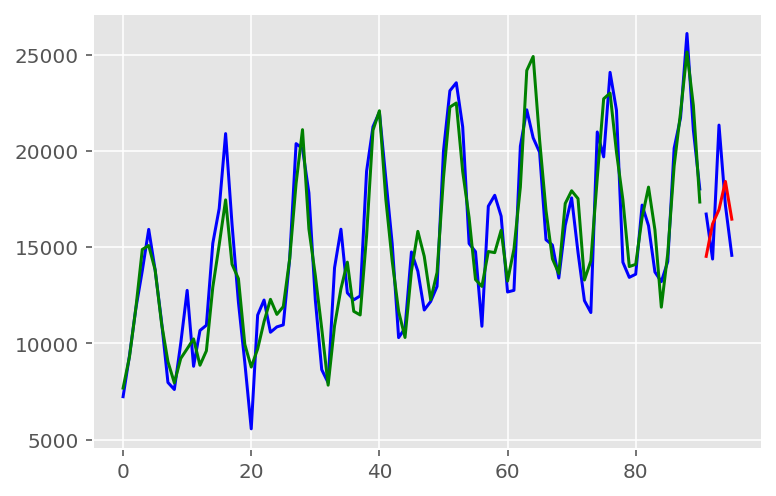

In [150]:
#   График с результатами

#   numpy.arange([start, ]stop, [step, ]dtype=None)¶

x2 = np.arange(0, 91, 1)

x3 = np.arange(91, 96, 1)


plt.plot(x2, y_train, color='blue')

plt.plot(x2, predictions_train, color='green')

plt.plot(x3, y_test, color='blue')

plt.plot(x3, predictions, color='red')



In [35]:
saved_model_path = "tf_save"

In [0]:
tf.saved_model.save(model, saved_model_path)

In [36]:
DEFAULT_FUNCTION_KEY = "serving_default"
loaded = tf.saved_model.load(saved_model_path)
inference_func = loaded.signatures[DEFAULT_FUNCTION_KEY]

In [37]:
X_all = X
X_all = X.values
y_all = y
y_all = y.values

In [39]:
#Тренеруем на всей выборке x_train + x_test = y_train + y_test
#  Обучение нейронной сети 

# Creating a model
model_fut = Sequential()
model_fut.add(Dense(8, input_dim=12, activation='relu'))
model_fut.add(Dense(1, activation='linear'))


# Compiling model
model_fut.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mean_absolute_percentage_error'])


# Training a model
model_fut.fit(X_all, y_all, epochs=300, batch_size=None)


Epoch 1/300


1/3 [=========>....................] - ETA: 20s - loss: 540093056.0000 - mean_absolute_percentage_error: 144.0096

3/3 [==============================] - 10s 2ms/step - loss: 497036808.0000 - mean_absolute_percentage_error: 147.0242


Epoch 2/300
1/3 [=========>....................] - ETA: 0s - loss: 458417888.0000 - mean_absolute_percentage_error: 147.1619

3/3 [==============================] - 0s 1ms/step - loss: 425618280.0000 - mean_absolute_percentage_error: 139.2655


Epoch 3/300
1/3 [=========>....................] - ETA: 0s - loss: 372007520.0000 - mean_absolute_percentage_error: 126.7453

3/3 [==============================] - 0s 2ms/step - loss: 359193480.0000 - mean_absolute_percentage_error: 126.1234


Epoch 4/300
1/3 [=========>....................] - ETA: 0s - loss: 314628768.0000 - mean_absolute_percentage_error: 123.3353

3/3 [==============================] - 0s 2ms/step - loss: 304528200.0000 - mean_absolute_percentage_error: 118.0206


Epoch 5/300
1/3 [=========>....................] - ETA: 0s - loss: 263828512.0000 - mean_absolute_percentage_error: 110.9547

3/3 [==============================] - 0s 1ms/step - loss: 255135552.0000 - mean_absolute_percentage_error: 106.3116


Epoch 6/300
1/3 [=========>....................] - ETA: 0s - loss: 233713920.0000 - mean_absolute_percentage_error: 105.5632

3/3 [==============================] - 0s 2ms/step - loss: 211527288.0000 - mean_absolute_percentage_error: 97.5020


Epoch 7/300
1/3 [=========>....................] - ETA: 0s - loss: 182815776.0000 - mean_absolute_percentage_error: 87.2112

3/3 [==============================] - 0s 1ms/step - loss: 170920060.0000 - mean_absolute_percentage_error: 85.0920


Epoch 8/300
1/3 [=========>....................] - ETA: 0s - loss: 146079968.0000 - mean_absolute_percentage_error: 81.1309

3/3 [==============================] - 0s 2ms/step - loss: 137110616.0000 - mean_absolute_percentage_error: 76.0353


Epoch 9/300
1/3 [=========>....................] - ETA: 0s - loss: 97481152.0000 - mean_absolute_percentage_error: 61.9762

3/3 [==============================] - 0s 1ms/step - loss: 99219452.0000 - mean_absolute_percentage_error: 62.7310


Epoch 10/300
1/3 [=========>....................] - ETA: 0s - loss: 90989576.0000 - mean_absolute_percentage_error: 57.0146

2/3 [===================>..........] - ETA: 0s - loss: 87872348.0000 - mean_absolute_percentage_error: 56.8335

3/3 [==============================] - 0s 34ms/step - loss: 82725094.0000 - mean_absolute_percentage_error: 55.2919


Epoch 11/300
1/3 [=========>....................] - ETA: 0s - loss: 69541360.0000 - mean_absolute_percentage_error: 47.1831

3/3 [==============================] - 0s 1ms/step - loss: 61746133.0000 - mean_absolute_percentage_error: 45.8958


Epoch 12/300
1/3 [=========>....................] - ETA: 0s - loss: 49756828.0000 - mean_absolute_percentage_error: 45.1669

3/3 [==============================] - 0s 1ms/step - loss: 46715209.0000 - mean_absolute_percentage_error: 41.5007


Epoch 13/300
1/3 [=========>....................] - ETA: 0s - loss: 32718956.0000 - mean_absolute_percentage_error: 31.7190

3/3 [==============================] - 0s 2ms/step - loss: 32968233.0000 - mean_absolute_percentage_error: 33.0516


Epoch 14/300
1/3 [=========>....................] - ETA: 0s - loss: 31119128.0000 - mean_absolute_percentage_error: 34.7168

3/3 [==============================] - 0s 2ms/step - loss: 28122861.5000 - mean_absolute_percentage_error: 31.8952


Epoch 15/300
1/3 [=========>....................] - ETA: 0s - loss: 21974024.0000 - mean_absolute_percentage_error: 27.3895

3/3 [==============================] - 0s 2ms/step - loss: 22077732.0000 - mean_absolute_percentage_error: 27.6167


Epoch 16/300
1/3 [=========>....................] - ETA: 0s - loss: 16488932.0000 - mean_absolute_percentage_error: 23.2851



3/3 [==============================] - 0s 2ms/step - loss: 17761874.0000 - mean_absolute_percentage_error: 25.5805


Epoch 17/300
1/3 [=========>....................] - ETA: 0s - loss: 16682852.0000 - mean_absolute_percentage_error: 26.6192

3/3 [==============================] - 0s 2ms/step - loss: 16836554.5000 - mean_absolute_percentage_error: 26.4669


Epoch 18/300
1/3 [=========>....................] - ETA: 0s - loss: 16726670.0000 - mean_absolute_percentage_error: 25.2621

3/3 [==============================] - 0s 2ms/step - loss: 16488616.7500 - mean_absolute_percentage_error: 25.6381


Epoch 19/300
1/3 [=========>....................] - ETA: 0s - loss: 16087560.0000 - mean_absolute_percentage_error: 25.5575

3/3 [==============================] - 0s 2ms/step - loss: 15811014.5000 - mean_absolute_percentage_error: 25.4134


Epoch 20/300
1/3 [=========>....................] - ETA: 0s - loss: 13826697.0000 - mean_absolute_percentage_error: 23.7292

3/3 [==============================] - 0s 2ms/step - loss: 15477779.2500 - mean_absolute_percentage_error: 24.9940


Epoch 21/300
1/3 [=========>....................] - ETA: 0s - loss: 14591520.0000 - mean_absolute_percentage_error: 21.9937

2/3 [===================>..........] - ETA: 0s - loss: 14222437.0000 - mean_absolute_percentage_error: 22.8281

3/3 [==============================] - ETA: 0s - loss: 14847988.3333 - mean_absolute_percentage_error: 23.8189

3/3 [==============================] - 0s 85ms/step - loss: 15160764.0000 - mean_absolute_percentage_error: 24.3143


Epoch 22/300


1/3 [=========>....................] - ETA: 0s - loss: 12071588.0000 - mean_absolute_percentage_error: 23.9442

3/3 [==============================] - 0s 5ms/step - loss: 15025590.0000 - mean_absolute_percentage_error: 25.4551


Epoch 23/300


1/3 [=========>....................] - ETA: 0s - loss: 21024464.0000 - mean_absolute_percentage_error: 33.6973

2/3 [===================>..........] - ETA: 0s - loss: 18937983.0000 - mean_absolute_percentage_error: 30.2430

3/3 [==============================] - 0s 39ms/step - loss: 17542795.5000 - mean_absolute_percentage_error: 28.0184


Epoch 24/300
1/3 [=========>....................] - ETA: 0s - loss: 18903014.0000 - mean_absolute_percentage_error: 26.5073

3/3 [==============================] - 0s 2ms/step - loss: 16941546.5000 - mean_absolute_percentage_error: 25.6820


Epoch 25/300
1/3 [=========>....................] - ETA: 0s - loss: 15710892.0000 - mean_absolute_percentage_error: 23.3328

3/3 [==============================] - 0s 2ms/step - loss: 15755877.0000 - mean_absolute_percentage_error: 24.9600


Epoch 26/300
1/3 [=========>....................] - ETA: 0s - loss: 16564695.0000 - mean_absolute_percentage_error: 26.6982

3/3 [==============================] - 0s 2ms/step - loss: 16069135.2500 - mean_absolute_percentage_error: 25.9521


Epoch 27/300
1/3 [=========>....................] - ETA: 0s - loss: 17256472.0000 - mean_absolute_percentage_error: 26.9996

3/3 [==============================] - 0s 1ms/step - loss: 15801799.5000 - mean_absolute_percentage_error: 25.5082


Epoch 28/300
1/3 [=========>....................] - ETA: 0s - loss: 12748135.0000 - mean_absolute_percentage_error: 28.0771

2/3 [===================>..........] - ETA: 0s - loss: 13419003.5000 - mean_absolute_percentage_error: 26.8668

3/3 [==============================] - 0s 36ms/step - loss: 14327647.7500 - mean_absolute_percentage_error: 25.9565


Epoch 29/300
1/3 [=========>....................] - ETA: 0s - loss: 10691880.0000 - mean_absolute_percentage_error: 20.0903

3/3 [==============================] - 0s 2ms/step - loss: 13978899.5000 - mean_absolute_percentage_error: 23.7970


Epoch 30/300
1/3 [=========>....................] - ETA: 0s - loss: 18812156.0000 - mean_absolute_percentage_error: 30.5783

3/3 [==============================] - 0s 2ms/step - loss: 16228437.5000 - mean_absolute_percentage_error: 26.7123


Epoch 31/300
1/3 [=========>....................] - ETA: 0s - loss: 13842398.0000 - mean_absolute_percentage_error: 22.3481

3/3 [==============================] - 0s 2ms/step - loss: 14156889.5000 - mean_absolute_percentage_error: 23.6443


Epoch 32/300
1/3 [=========>....................] - ETA: 0s - loss: 14430210.0000 - mean_absolute_percentage_error: 24.4242

3/3 [==============================] - 0s 2ms/step - loss: 14724794.0000 - mean_absolute_percentage_error: 24.8158


Epoch 33/300
1/3 [=========>....................] - ETA: 0s - loss: 14776431.0000 - mean_absolute_percentage_error: 24.7643

2/3 [===================>..........] - ETA: 0s - loss: 14125369.5000 - mean_absolute_percentage_error: 24.3495

3/3 [==============================] - 0s 35ms/step - loss: 14266028.7500 - mean_absolute_percentage_error: 24.3167


Epoch 34/300
1/3 [=========>....................] - ETA: 0s - loss: 12502589.0000 - mean_absolute_percentage_error: 21.7335

3/3 [==============================] - 0s 2ms/step - loss: 13747972.5000 - mean_absolute_percentage_error: 23.5789


Epoch 35/300


1/3 [=========>....................] - ETA: 0s - loss: 18510516.0000 - mean_absolute_percentage_error: 26.5007

3/3 [==============================] - 0s 3ms/step - loss: 15476345.0000 - mean_absolute_percentage_error: 24.6255


Epoch 36/300


1/3 [=========>....................] - ETA: 0s - loss: 17050672.0000 - mean_absolute_percentage_error: 28.2412

3/3 [==============================] - 0s 2ms/step - loss: 14871704.5000 - mean_absolute_percentage_error: 25.4544


Epoch 37/300
1/3 [=========>....................] - ETA: 0s - loss: 14617503.0000 - mean_absolute_percentage_error: 27.1136

3/3 [==============================] - ETA: 0s - loss: 14263631.3333 - mean_absolute_percentage_error: 25.5016

3/3 [==============================] - 0s 35ms/step - loss: 14171792.7500 - mean_absolute_percentage_error: 25.0803


Epoch 38/300


1/3 [=========>....................] - ETA: 0s - loss: 12296940.0000 - mean_absolute_percentage_error: 22.1481

3/3 [==============================] - 0s 2ms/step - loss: 13073882.0000 - mean_absolute_percentage_error: 23.1361


Epoch 39/300


1/3 [=========>....................] - ETA: 0s - loss: 13921228.0000 - mean_absolute_percentage_error: 25.9367

3/3 [==============================] - 0s 1ms/step - loss: 13561265.7500 - mean_absolute_percentage_error: 23.8527


Epoch 40/300
1/3 [=========>....................] - ETA: 0s - loss: 12120779.0000 - mean_absolute_percentage_error: 20.9129

3/3 [==============================] - 0s 1ms/step - loss: 12840127.7500 - mean_absolute_percentage_error: 22.6943


Epoch 41/300


1/3 [=========>....................] - ETA: 0s - loss: 16924878.0000 - mean_absolute_percentage_error: 27.8003

3/3 [==============================] - 0s 2ms/step - loss: 14651405.5000 - mean_absolute_percentage_error: 24.9732


Epoch 42/300
1/3 [=========>....................] - ETA: 0s - loss: 14585643.0000 - mean_absolute_percentage_error: 23.8927

3/3 [==============================] - 0s 2ms/step - loss: 14099155.7500 - mean_absolute_percentage_error: 24.1324


Epoch 43/300


1/3 [=========>....................] - ETA: 0s - loss: 12279268.0000 - mean_absolute_percentage_error: 22.8144

2/3 [===================>..........] - ETA: 0s - loss: 13239808.5000 - mean_absolute_percentage_error: 23.3729

3/3 [==============================] - 0s 34ms/step - loss: 13182754.7500 - mean_absolute_percentage_error: 23.2473


Epoch 44/300


1/3 [=========>....................] - ETA: 0s - loss: 11257958.0000 - mean_absolute_percentage_error: 24.7914

3/3 [==============================] - 0s 2ms/step - loss: 12443341.7500 - mean_absolute_percentage_error: 23.4458


Epoch 45/300
1/3 [=========>....................] - ETA: 0s - loss: 16502298.0000 - mean_absolute_percentage_error: 24.6119

3/3 [==============================] - 0s 2ms/step - loss: 13962862.7500 - mean_absolute_percentage_error: 23.5892


Epoch 46/300
1/3 [=========>....................] - ETA: 0s - loss: 13329576.0000 - mean_absolute_percentage_error: 21.7265

3/3 [==============================] - 0s 2ms/step - loss: 13004942.7500 - mean_absolute_percentage_error: 22.3741


Epoch 47/300
1/3 [=========>....................] - ETA: 0s - loss: 12184147.0000 - mean_absolute_percentage_error: 24.1187

3/3 [==============================] - ETA: 0s - loss: 12508315.3333 - mean_absolute_percentage_error: 23.6460

3/3 [==============================] - 0s 43ms/step - loss: 12538900.7500 - mean_absolute_percentage_error: 23.4038


Epoch 48/300
1/3 [=========>....................] - ETA: 0s - loss: 9639309.0000 - mean_absolute_percentage_error: 22.8708

2/3 [===================>..........] - ETA: 0s - loss: 10788064.5000 - mean_absolute_percentage_error: 22.9506

3/3 [==============================] - 0s 40ms/step - loss: 11648892.7500 - mean_absolute_percentage_error: 22.7566


Epoch 49/300


1/3 [=========>....................] - ETA: 0s - loss: 13390749.0000 - mean_absolute_percentage_error: 24.8525

3/3 [==============================] - 0s 5ms/step - loss: 12648816.5000 - mean_absolute_percentage_error: 23.1409


Epoch 50/300
1/3 [=========>....................] - ETA: 0s - loss: 13887962.0000 - mean_absolute_percentage_error: 21.1188

3/3 [==============================] - ETA: 0s - loss: 12934348.3333 - mean_absolute_percentage_error: 21.7473

3/3 [==============================] - 0s 39ms/step - loss: 12771324.5000 - mean_absolute_percentage_error: 21.8941


Epoch 51/300
1/3 [=========>....................] - ETA: 0s - loss: 13455148.0000 - mean_absolute_percentage_error: 22.5537

3/3 [==============================] - 0s 1ms/step - loss: 12297902.5000 - mean_absolute_percentage_error: 22.0919


Epoch 52/300


1/3 [=========>....................] - ETA: 0s - loss: 10504474.0000 - mean_absolute_percentage_error: 22.2488

3/3 [==============================] - 0s 2ms/step - loss: 11671609.0000 - mean_absolute_percentage_error: 22.4268


Epoch 53/300
1/3 [=========>....................] - ETA: 0s - loss: 12736121.0000 - mean_absolute_percentage_error: 22.0929

3/3 [==============================] - 0s 1ms/step - loss: 12554093.7500 - mean_absolute_percentage_error: 22.7087


Epoch 54/300
1/3 [=========>....................] - ETA: 0s - loss: 9880142.0000 - mean_absolute_percentage_error: 20.8143

3/3 [==============================] - 0s 2ms/step - loss: 10869550.5000 - mean_absolute_percentage_error: 21.2144


Epoch 55/300
1/3 [=========>....................] - ETA: 0s - loss: 10129825.0000 - mean_absolute_percentage_error: 18.0459

3/3 [==============================] - 0s 2ms/step - loss: 11216696.7500 - mean_absolute_percentage_error: 20.5368


Epoch 56/300
1/3 [=========>....................] - ETA: 0s - loss: 11237970.0000 - mean_absolute_percentage_error: 23.0852

3/3 [==============================] - 0s 1ms/step - loss: 11580049.7500 - mean_absolute_percentage_error: 22.2518


Epoch 57/300
1/3 [=========>....................] - ETA: 0s - loss: 11243181.0000 - mean_absolute_percentage_error: 21.1933

3/3 [==============================] - 0s 2ms/step - loss: 11544939.2500 - mean_absolute_percentage_error: 21.5436


Epoch 58/300
1/3 [=========>....................] - ETA: 0s - loss: 15294352.0000 - mean_absolute_percentage_error: 28.1552

3/3 [==============================] - 0s 1ms/step - loss: 12613141.7500 - mean_absolute_percentage_error: 23.7145


Epoch 59/300


1/3 [=========>....................] - ETA: 0s - loss: 10467709.0000 - mean_absolute_percentage_error: 19.6745

3/3 [==============================] - 0s 1ms/step - loss: 11073547.2500 - mean_absolute_percentage_error: 20.7017


Epoch 60/300
1/3 [=========>....................] - ETA: 0s - loss: 13030848.0000 - mean_absolute_percentage_error: 22.6944

3/3 [==============================] - 0s 2ms/step - loss: 11818142.5000 - mean_absolute_percentage_error: 21.5086


Epoch 61/300
1/3 [=========>....................] - ETA: 0s - loss: 10527128.0000 - mean_absolute_percentage_error: 20.3036

3/3 [==============================] - 0s 1ms/step - loss: 10619387.2500 - mean_absolute_percentage_error: 20.5903


Epoch 62/300


1/3 [=========>....................] - ETA: 0s - loss: 13105614.0000 - mean_absolute_percentage_error: 22.3230

3/3 [==============================] - 0s 1ms/step - loss: 11865778.5000 - mean_absolute_percentage_error: 21.7072


Epoch 63/300
1/3 [=========>....................] - ETA: 0s - loss: 13084938.0000 - mean_absolute_percentage_error: 23.5029

3/3 [==============================] - 0s 1ms/step - loss: 11223808.0000 - mean_absolute_percentage_error: 21.4539


Epoch 64/300
1/3 [=========>....................] - ETA: 0s - loss: 5915411.0000 - mean_absolute_percentage_error: 13.0204

3/3 [==============================] - 0s 1ms/step - loss: 9567375.2500 - mean_absolute_percentage_error: 18.6774


Epoch 65/300


1/3 [=========>....................] - ETA: 0s - loss: 7500844.0000 - mean_absolute_percentage_error: 17.3387

3/3 [==============================] - 0s 2ms/step - loss: 9573974.5000 - mean_absolute_percentage_error: 19.2478


Epoch 66/300


1/3 [=========>....................] - ETA: 0s - loss: 10228561.0000 - mean_absolute_percentage_error: 21.0797

3/3 [==============================] - 0s 2ms/step - loss: 10444479.7500 - mean_absolute_percentage_error: 20.7000


Epoch 67/300
1/3 [=========>....................] - ETA: 0s - loss: 8983556.0000 - mean_absolute_percentage_error: 18.1353

3/3 [==============================] - 0s 2ms/step - loss: 9908981.5000 - mean_absolute_percentage_error: 19.6358


Epoch 68/300


1/3 [=========>....................] - ETA: 0s - loss: 9147046.0000 - mean_absolute_percentage_error: 18.4882

3/3 [==============================] - 0s 2ms/step - loss: 10192532.2500 - mean_absolute_percentage_error: 20.0475


Epoch 69/300


1/3 [=========>....................] - ETA: 0s - loss: 9329011.0000 - mean_absolute_percentage_error: 18.8117

3/3 [==============================] - ETA: 0s - loss: 10359282.0000 - mean_absolute_percentage_error: 20.4937

3/3 [==============================] - 0s 37ms/step - loss: 10354473.2500 - mean_absolute_percentage_error: 20.4421


Epoch 70/300


1/3 [=========>....................] - ETA: 0s - loss: 9935536.0000 - mean_absolute_percentage_error: 19.8880

3/3 [==============================] - 0s 4ms/step - loss: 9981722.0000 - mean_absolute_percentage_error: 19.9534


Epoch 71/300


1/3 [=========>....................] - ETA: 0s - loss: 12690498.0000 - mean_absolute_percentage_error: 23.8639

3/3 [==============================] - 0s 2ms/step - loss: 10962258.0000 - mean_absolute_percentage_error: 21.3534


Epoch 72/300
1/3 [=========>....................] - ETA: 0s - loss: 7437568.5000 - mean_absolute_percentage_error: 18.4587

3/3 [==============================] - 0s 2ms/step - loss: 9344848.6250 - mean_absolute_percentage_error: 19.5239


Epoch 73/300
1/3 [=========>....................] - ETA: 0s - loss: 8424892.0000 - mean_absolute_percentage_error: 17.4008

3/3 [==============================] - 0s 2ms/step - loss: 9588923.5000 - mean_absolute_percentage_error: 19.2200


Epoch 74/300
1/3 [=========>....................] - ETA: 0s - loss: 11564085.0000 - mean_absolute_percentage_error: 19.8426

3/3 [==============================] - 0s 6ms/step - loss: 10517424.2500 - mean_absolute_percentage_error: 19.9728


Epoch 75/300
1/3 [=========>....................] - ETA: 0s - loss: 6136717.0000 - mean_absolute_percentage_error: 14.2620

3/3 [==============================] - ETA: 0s - loss: 7901354.3333 - mean_absolute_percentage_error: 17.1625

3/3 [==============================] - 0s 37ms/step - loss: 8375760.0000 - mean_absolute_percentage_error: 17.7887


Epoch 76/300


1/3 [=========>....................] - ETA: 0s - loss: 7818093.0000 - mean_absolute_percentage_error: 20.2140

3/3 [==============================] - 0s 1ms/step - loss: 8996034.5000 - mean_absolute_percentage_error: 19.8045


Epoch 77/300
1/3 [=========>....................] - ETA: 0s - loss: 10311684.0000 - mean_absolute_percentage_error: 16.5307

3/3 [==============================] - 0s 2ms/step - loss: 9935941.5000 - mean_absolute_percentage_error: 18.5460


Epoch 78/300


1/3 [=========>....................] - ETA: 0s - loss: 8834745.0000 - mean_absolute_percentage_error: 17.0989

3/3 [==============================] - 0s 1ms/step - loss: 9475853.2500 - mean_absolute_percentage_error: 18.6762


Epoch 79/300
1/3 [=========>....................] - ETA: 0s - loss: 11395409.0000 - mean_absolute_percentage_error: 20.6023

3/3 [==============================] - 0s 2ms/step - loss: 9940526.2500 - mean_absolute_percentage_error: 19.4343


Epoch 80/300
1/3 [=========>....................] - ETA: 0s - loss: 9082290.0000 - mean_absolute_percentage_error: 21.1788

3/3 [==============================] - 0s 2ms/step - loss: 9187229.5000 - mean_absolute_percentage_error: 19.8385


Epoch 81/300
1/3 [=========>....................] - ETA: 0s - loss: 6852166.5000 - mean_absolute_percentage_error: 16.8703

3/3 [==============================] - ETA: 0s - loss: 8772544.1667 - mean_absolute_percentage_error: 18.4061

3/3 [==============================] - 0s 33ms/step - loss: 8905971.8750 - mean_absolute_percentage_error: 18.5714


Epoch 82/300


1/3 [=========>....................] - ETA: 0s - loss: 6472752.0000 - mean_absolute_percentage_error: 16.3737

3/3 [==============================] - 0s 2ms/step - loss: 8197814.3750 - mean_absolute_percentage_error: 17.8380


Epoch 83/300
1/3 [=========>....................] - ETA: 0s - loss: 5851992.0000 - mean_absolute_percentage_error: 16.1018

3/3 [==============================] - 0s 2ms/step - loss: 7771032.2500 - mean_absolute_percentage_error: 17.5110


Epoch 84/300
1/3 [=========>....................] - ETA: 0s - loss: 6618858.5000 - mean_absolute_percentage_error: 15.8948

3/3 [==============================] - 0s 1ms/step - loss: 8054634.8750 - mean_absolute_percentage_error: 17.5732


Epoch 85/300


1/3 [=========>....................] - ETA: 0s - loss: 8665394.0000 - mean_absolute_percentage_error: 17.2060

3/3 [==============================] - 0s 2ms/step - loss: 8622250.6250 - mean_absolute_percentage_error: 17.8645


Epoch 86/300
1/3 [=========>....................] - ETA: 0s - loss: 9234880.0000 - mean_absolute_percentage_error: 18.3299

3/3 [==============================] - 0s 2ms/step - loss: 9084122.0000 - mean_absolute_percentage_error: 18.8306


Epoch 87/300
1/3 [=========>....................] - ETA: 0s - loss: 9241115.0000 - mean_absolute_percentage_error: 20.0881

2/3 [===================>..........] - ETA: 0s - loss: 9215864.5000 - mean_absolute_percentage_error: 19.4691

3/3 [==============================] - 0s 32ms/step - loss: 9033816.2500 - mean_absolute_percentage_error: 18.9916


Epoch 88/300


1/3 [=========>....................] - ETA: 0s - loss: 12281935.0000 - mean_absolute_percentage_error: 20.0501

3/3 [==============================] - 0s 2ms/step - loss: 9719833.2500 - mean_absolute_percentage_error: 18.7095


Epoch 89/300
1/3 [=========>....................] - ETA: 0s - loss: 8635104.0000 - mean_absolute_percentage_error: 18.9342

3/3 [==============================] - 0s 2ms/step - loss: 8696611.0000 - mean_absolute_percentage_error: 18.6214


Epoch 90/300
1/3 [=========>....................] - ETA: 0s - loss: 9444509.0000 - mean_absolute_percentage_error: 19.5086

3/3 [==============================] - 0s 2ms/step - loss: 9004929.2500 - mean_absolute_percentage_error: 18.7300


Epoch 91/300
1/3 [=========>....................] - ETA: 0s - loss: 10305908.0000 - mean_absolute_percentage_error: 20.7473

3/3 [==============================] - 0s 2ms/step - loss: 8830626.7500 - mean_absolute_percentage_error: 18.7512


Epoch 92/300


1/3 [=========>....................] - ETA: 0s - loss: 6392200.0000 - mean_absolute_percentage_error: 14.0977

3/3 [==============================] - 0s 2ms/step - loss: 8016261.5000 - mean_absolute_percentage_error: 17.0477


Epoch 93/300
1/3 [=========>....................] - ETA: 0s - loss: 10412210.0000 - mean_absolute_percentage_error: 21.5805

3/3 [==============================] - ETA: 0s - loss: 9426378.6667 - mean_absolute_percentage_error: 19.6176 

3/3 [==============================] - 0s 30ms/step - loss: 9174331.5000 - mean_absolute_percentage_error: 19.2105


Epoch 94/300


1/3 [=========>....................] - ETA: 0s - loss: 8598343.0000 - mean_absolute_percentage_error: 16.7662

3/3 [==============================] - 0s 3ms/step - loss: 8304724.0000 - mean_absolute_percentage_error: 17.1521


Epoch 95/300


1/3 [=========>....................] - ETA: 0s - loss: 5217402.5000 - mean_absolute_percentage_error: 15.2587

3/3 [==============================] - 0s 2ms/step - loss: 7436031.6250 - mean_absolute_percentage_error: 16.8525


Epoch 96/300


1/3 [=========>....................] - ETA: 0s - loss: 6301726.0000 - mean_absolute_percentage_error: 14.5452

3/3 [==============================] - 0s 1ms/step - loss: 7837814.7500 - mean_absolute_percentage_error: 17.0227


Epoch 97/300


1/3 [=========>....................] - ETA: 0s - loss: 5421220.0000 - mean_absolute_percentage_error: 15.7972

3/3 [==============================] - 0s 3ms/step - loss: 7293634.0000 - mean_absolute_percentage_error: 17.0838


Epoch 98/300


1/3 [=========>....................] - ETA: 0s - loss: 7090114.0000 - mean_absolute_percentage_error: 17.6131

2/3 [===================>..........] - ETA: 0s - loss: 7757992.5000 - mean_absolute_percentage_error: 17.8530

3/3 [==============================] - 0s 40ms/step - loss: 7919210.5000 - mean_absolute_percentage_error: 17.7075


Epoch 99/300


1/3 [=========>....................] - ETA: 0s - loss: 6754424.0000 - mean_absolute_percentage_error: 14.9507

3/3 [==============================] - 0s 2ms/step - loss: 7867937.0000 - mean_absolute_percentage_error: 17.2457


Epoch 100/300


1/3 [=========>....................] - ETA: 0s - loss: 9947886.0000 - mean_absolute_percentage_error: 19.2531

3/3 [==============================] - 0s 2ms/step - loss: 8542559.1250 - mean_absolute_percentage_error: 17.8438


Epoch 101/300
1/3 [=========>....................] - ETA: 0s - loss: 5559195.5000 - mean_absolute_percentage_error: 13.3367

2/3 [===================>..........] - ETA: 0s - loss: 6416172.7500 - mean_absolute_percentage_error: 14.9080

3/3 [==============================] - 0s 37ms/step - loss: 7149584.1250 - mean_absolute_percentage_error: 16.1096


Epoch 102/300
1/3 [=========>....................] - ETA: 0s - loss: 6209527.0000 - mean_absolute_percentage_error: 14.3876

3/3 [==============================] - 0s 1ms/step - loss: 7538118.6250 - mean_absolute_percentage_error: 16.6976


Epoch 103/300
1/3 [=========>....................] - ETA: 0s - loss: 6722525.0000 - mean_absolute_percentage_error: 15.5724

3/3 [==============================] - 0s 1ms/step - loss: 7373369.5000 - mean_absolute_percentage_error: 16.3997


Epoch 104/300


1/3 [=========>....................] - ETA: 0s - loss: 5311570.5000 - mean_absolute_percentage_error: 15.9052

3/3 [==============================] - 0s 2ms/step - loss: 7045733.1250 - mean_absolute_percentage_error: 16.5484


Epoch 105/300
1/3 [=========>....................] - ETA: 0s - loss: 10004368.0000 - mean_absolute_percentage_error: 20.6831

3/3 [==============================] - 0s 2ms/step - loss: 8245970.7500 - mean_absolute_percentage_error: 17.9691


Epoch 106/300
1/3 [=========>....................] - ETA: 0s - loss: 9119258.0000 - mean_absolute_percentage_error: 20.9112

3/3 [==============================] - 0s 2ms/step - loss: 8142946.7500 - mean_absolute_percentage_error: 18.1649


Epoch 107/300
1/3 [=========>....................] - ETA: 0s - loss: 8487042.0000 - mean_absolute_percentage_error: 16.0017

2/3 [===================>..........] - ETA: 0s - loss: 8213963.0000 - mean_absolute_percentage_error: 16.3317

3/3 [==============================] - 0s 32ms/step - loss: 7861994.5000 - mean_absolute_percentage_error: 16.5840


Epoch 108/300


1/3 [=========>....................] - ETA: 0s - loss: 8330787.0000 - mean_absolute_percentage_error: 18.6001

3/3 [==============================] - 0s 1ms/step - loss: 7761122.5000 - mean_absolute_percentage_error: 17.4484


Epoch 109/300


1/3 [=========>....................] - ETA: 0s - loss: 7465098.0000 - mean_absolute_percentage_error: 18.6055

3/3 [==============================] - 0s 2ms/step - loss: 7377147.5000 - mean_absolute_percentage_error: 17.4474


Epoch 110/300
1/3 [=========>....................] - ETA: 0s - loss: 6857427.0000 - mean_absolute_percentage_error: 17.5430

3/3 [==============================] - 0s 1ms/step - loss: 7104572.8750 - mean_absolute_percentage_error: 16.7268


Epoch 111/300


1/3 [=========>....................] - ETA: 0s - loss: 6939227.0000 - mean_absolute_percentage_error: 16.6819

3/3 [==============================] - 0s 1ms/step - loss: 7226450.7500 - mean_absolute_percentage_error: 16.6466


Epoch 112/300


1/3 [=========>....................] - ETA: 0s - loss: 7979662.5000 - mean_absolute_percentage_error: 16.9115

3/3 [==============================] - 0s 2ms/step - loss: 7375716.6250 - mean_absolute_percentage_error: 16.4368


Epoch 113/300
1/3 [=========>....................] - ETA: 0s - loss: 8761961.0000 - mean_absolute_percentage_error: 19.8562

2/3 [===================>..........] - ETA: 0s - loss: 7518832.5000 - mean_absolute_percentage_error: 17.8176

3/3 [==============================] - 0s 33ms/step - loss: 7343043.0000 - mean_absolute_percentage_error: 17.0960


Epoch 114/300
1/3 [=========>....................] - ETA: 0s - loss: 6411100.0000 - mean_absolute_percentage_error: 15.3646

3/3 [==============================] - 0s 2ms/step - loss: 6850993.1250 - mean_absolute_percentage_error: 16.0208


Epoch 115/300
1/3 [=========>....................] - ETA: 0s - loss: 6738721.0000 - mean_absolute_percentage_error: 17.3671

3/3 [==============================] - 0s 1ms/step - loss: 6769417.8750 - mean_absolute_percentage_error: 16.5114


Epoch 116/300
1/3 [=========>....................] - ETA: 0s - loss: 7964981.0000 - mean_absolute_percentage_error: 17.4069

3/3 [==============================] - 0s 1ms/step - loss: 7516305.1250 - mean_absolute_percentage_error: 16.7432


Epoch 117/300


1/3 [=========>....................] - ETA: 0s - loss: 9705052.0000 - mean_absolute_percentage_error: 18.2732

3/3 [==============================] - 0s 1ms/step - loss: 7992692.0000 - mean_absolute_percentage_error: 17.0938


Epoch 118/300


1/3 [=========>....................] - ETA: 0s - loss: 5258786.5000 - mean_absolute_percentage_error: 12.6459

3/3 [==============================] - 0s 1ms/step - loss: 6181863.3750 - mean_absolute_percentage_error: 15.1252


Epoch 119/300


1/3 [=========>....................] - ETA: 0s - loss: 8042157.0000 - mean_absolute_percentage_error: 15.8860

3/3 [==============================] - 0s 2ms/step - loss: 7224354.0000 - mean_absolute_percentage_error: 16.0111


Epoch 120/300


1/3 [=========>....................] - ETA: 0s - loss: 9666022.0000 - mean_absolute_percentage_error: 20.5402

3/3 [==============================] - 0s 2ms/step - loss: 7817142.5000 - mean_absolute_percentage_error: 17.4122


Epoch 121/300
1/3 [=========>....................] - ETA: 0s - loss: 6244464.0000 - mean_absolute_percentage_error: 12.7658

2/3 [===================>..........] - ETA: 0s - loss: 5988701.5000 - mean_absolute_percentage_error: 13.0823

3/3 [==============================] - 0s 40ms/step - loss: 6368142.0000 - mean_absolute_percentage_error: 14.4275


Epoch 122/300
1/3 [=========>....................] - ETA: 0s - loss: 8145289.5000 - mean_absolute_percentage_error: 20.7566

3/3 [==============================] - 0s 2ms/step - loss: 7133747.3750 - mean_absolute_percentage_error: 17.3364


Epoch 123/300
1/3 [=========>....................] - ETA: 0s - loss: 7575253.0000 - mean_absolute_percentage_error: 17.0719

3/3 [==============================] - 0s 2ms/step - loss: 6867342.6250 - mean_absolute_percentage_error: 15.9195


Epoch 124/300


1/3 [=========>....................] - ETA: 0s - loss: 6501728.0000 - mean_absolute_percentage_error: 14.8218

2/3 [===================>..........] - ETA: 0s - loss: 6072544.5000 - mean_absolute_percentage_error: 14.3613

3/3 [==============================] - 0s 40ms/step - loss: 6332943.0000 - mean_absolute_percentage_error: 14.9556


Epoch 125/300


1/3 [=========>....................] - ETA: 0s - loss: 4531344.5000 - mean_absolute_percentage_error: 12.4717



3/3 [==============================] - 0s 2ms/step - loss: 5844925.1250 - mean_absolute_percentage_error: 14.3300


Epoch 126/300
1/3 [=========>....................] - ETA: 0s - loss: 5109688.0000 - mean_absolute_percentage_error: 13.3473

3/3 [==============================] - 0s 2ms/step - loss: 6155508.2500 - mean_absolute_percentage_error: 14.7702


Epoch 127/300
1/3 [=========>....................] - ETA: 0s - loss: 8293325.0000 - mean_absolute_percentage_error: 15.3267

3/3 [==============================] - 0s 3ms/step - loss: 7198896.0000 - mean_absolute_percentage_error: 15.4281


Epoch 128/300
1/3 [=========>....................] - ETA: 0s - loss: 6432601.5000 - mean_absolute_percentage_error: 12.7586

2/3 [===================>..........] - ETA: 0s - loss: 6145718.7500 - mean_absolute_percentage_error: 13.7331

3/3 [==============================] - 0s 36ms/step - loss: 6280296.1250 - mean_absolute_percentage_error: 14.5092


Epoch 129/300


1/3 [=========>....................] - ETA: 0s - loss: 9027906.0000 - mean_absolute_percentage_error: 18.2401

3/3 [==============================] - 0s 1ms/step - loss: 7173495.0000 - mean_absolute_percentage_error: 16.0306


Epoch 130/300
1/3 [=========>....................] - ETA: 0s - loss: 6679415.0000 - mean_absolute_percentage_error: 16.2155

3/3 [==============================] - 0s 1ms/step - loss: 6422195.3750 - mean_absolute_percentage_error: 15.4685


Epoch 131/300


1/3 [=========>....................] - ETA: 0s - loss: 6832841.5000 - mean_absolute_percentage_error: 15.0426

3/3 [==============================] - 0s 1ms/step - loss: 6245589.1250 - mean_absolute_percentage_error: 14.7422


Epoch 132/300
1/3 [=========>....................] - ETA: 0s - loss: 5647368.0000 - mean_absolute_percentage_error: 13.2038

3/3 [==============================] - 0s 1ms/step - loss: 6042059.6250 - mean_absolute_percentage_error: 14.1857


Epoch 133/300
1/3 [=========>....................] - ETA: 0s - loss: 7482719.0000 - mean_absolute_percentage_error: 17.6501

3/3 [==============================] - 0s 2ms/step - loss: 6821925.2500 - mean_absolute_percentage_error: 16.0438


Epoch 134/300
1/3 [=========>....................] - ETA: 0s - loss: 6021875.5000 - mean_absolute_percentage_error: 14.3528

2/3 [===================>..........] - ETA: 0s - loss: 5864138.7500 - mean_absolute_percentage_error: 14.1651

3/3 [==============================] - 0s 34ms/step - loss: 6006141.1250 - mean_absolute_percentage_error: 14.5188


Epoch 135/300


1/3 [=========>....................] - ETA: 0s - loss: 4828537.0000 - mean_absolute_percentage_error: 13.9717

3/3 [==============================] - 0s 2ms/step - loss: 5627009.6250 - mean_absolute_percentage_error: 14.5707


Epoch 136/300


1/3 [=========>....................] - ETA: 0s - loss: 5703753.0000 - mean_absolute_percentage_error: 14.4950

3/3 [==============================] - 0s 1ms/step - loss: 5878058.7500 - mean_absolute_percentage_error: 14.4323


Epoch 137/300
1/3 [=========>....................] - ETA: 0s - loss: 5569726.0000 - mean_absolute_percentage_error: 16.1843

3/3 [==============================] - 0s 1ms/step - loss: 5763822.7500 - mean_absolute_percentage_error: 14.9468


Epoch 138/300
1/3 [=========>....................] - ETA: 0s - loss: 6336551.0000 - mean_absolute_percentage_error: 14.2057

3/3 [==============================] - 0s 2ms/step - loss: 6194826.7500 - mean_absolute_percentage_error: 14.7658


Epoch 139/300
1/3 [=========>....................] - ETA: 0s - loss: 5914404.0000 - mean_absolute_percentage_error: 16.3794

3/3 [==============================] - 0s 1ms/step - loss: 5971822.8750 - mean_absolute_percentage_error: 15.0230


Epoch 140/300
1/3 [=========>....................] - ETA: 0s - loss: 7402747.0000 - mean_absolute_percentage_error: 18.5029

3/3 [==============================] - 0s 2ms/step - loss: 6363849.1250 - mean_absolute_percentage_error: 15.7764


Epoch 141/300


1/3 [=========>....................] - ETA: 0s - loss: 5390961.0000 - mean_absolute_percentage_error: 12.1695

3/3 [==============================] - 0s 2ms/step - loss: 5652057.0000 - mean_absolute_percentage_error: 13.5848


Epoch 142/300
1/3 [=========>....................] - ETA: 0s - loss: 5811670.0000 - mean_absolute_percentage_error: 16.4349

3/3 [==============================] - 0s 1ms/step - loss: 5710187.0000 - mean_absolute_percentage_error: 14.9308


Epoch 143/300


1/3 [=========>....................] - ETA: 0s - loss: 3147680.5000 - mean_absolute_percentage_error: 10.7548

3/3 [==============================] - 0s 1ms/step - loss: 4882838.5000 - mean_absolute_percentage_error: 13.1804


Epoch 144/300
1/3 [=========>....................] - ETA: 0s - loss: 4976946.0000 - mean_absolute_percentage_error: 14.5483

3/3 [==============================] - 0s 1ms/step - loss: 5784733.3750 - mean_absolute_percentage_error: 14.5066


Epoch 145/300


1/3 [=========>....................] - ETA: 0s - loss: 6149065.0000 - mean_absolute_percentage_error: 15.8170

2/3 [===================>..........] - ETA: 0s - loss: 6102569.0000 - mean_absolute_percentage_error: 15.2299

3/3 [==============================] - 0s 37ms/step - loss: 5905372.5000 - mean_absolute_percentage_error: 14.6972


Epoch 146/300


1/3 [=========>....................] - ETA: 0s - loss: 6471572.0000 - mean_absolute_percentage_error: 16.5017

3/3 [==============================] - 0s 2ms/step - loss: 5690362.8750 - mean_absolute_percentage_error: 14.6330


Epoch 147/300
1/3 [=========>....................] - ETA: 0s - loss: 5560823.0000 - mean_absolute_percentage_error: 13.1628

3/3 [==============================] - 0s 2ms/step - loss: 5550326.7500 - mean_absolute_percentage_error: 13.5490


Epoch 148/300


1/3 [=========>....................] - ETA: 0s - loss: 6057913.0000 - mean_absolute_percentage_error: 12.7065

3/3 [==============================] - 0s 11ms/step - loss: 5695061.7500 - mean_absolute_percentage_error: 13.2340


Epoch 149/300
1/3 [=========>....................] - ETA: 0s - loss: 6083018.5000 - mean_absolute_percentage_error: 13.4820

3/3 [==============================] - 0s 2ms/step - loss: 5792945.1250 - mean_absolute_percentage_error: 13.7302


Epoch 150/300


1/3 [=========>....................] - ETA: 0s - loss: 5499333.0000 - mean_absolute_percentage_error: 14.0149

3/3 [==============================] - 0s 2ms/step - loss: 5605281.1250 - mean_absolute_percentage_error: 13.9376


Epoch 151/300


1/3 [=========>....................] - ETA: 0s - loss: 5562526.0000 - mean_absolute_percentage_error: 13.8663

3/3 [==============================] - 0s 2ms/step - loss: 5632469.5000 - mean_absolute_percentage_error: 14.1301


Epoch 152/300


1/3 [=========>....................] - ETA: 0s - loss: 8674882.0000 - mean_absolute_percentage_error: 18.7641

3/3 [==============================] - 0s 1ms/step - loss: 6478280.0000 - mean_absolute_percentage_error: 15.3738


Epoch 153/300
1/3 [=========>....................] - ETA: 0s - loss: 4364225.5000 - mean_absolute_percentage_error: 11.1129

3/3 [==============================] - 0s 1ms/step - loss: 5058799.8750 - mean_absolute_percentage_error: 12.9889


Epoch 154/300
1/3 [=========>....................] - ETA: 0s - loss: 3604939.5000 - mean_absolute_percentage_error: 10.9789

3/3 [==============================] - 0s 2ms/step - loss: 4905409.3750 - mean_absolute_percentage_error: 12.8780


Epoch 155/300
1/3 [=========>....................] - ETA: 0s - loss: 6108536.5000 - mean_absolute_percentage_error: 14.4648

3/3 [==============================] - 0s 3ms/step - loss: 5668992.8750 - mean_absolute_percentage_error: 14.0876


Epoch 156/300
1/3 [=========>....................] - ETA: 0s - loss: 4027405.5000 - mean_absolute_percentage_error: 10.3883

3/3 [==============================] - 0s 2ms/step - loss: 4783538.8750 - mean_absolute_percentage_error: 12.1772


Epoch 157/300
1/3 [=========>....................] - ETA: 0s - loss: 7091121.0000 - mean_absolute_percentage_error: 16.8442

3/3 [==============================] - 0s 2ms/step - loss: 6048034.3750 - mean_absolute_percentage_error: 14.8132


Epoch 158/300


1/3 [=========>....................] - ETA: 0s - loss: 4689046.0000 - mean_absolute_percentage_error: 13.6734

3/3 [==============================] - 0s 2ms/step - loss: 5076654.0000 - mean_absolute_percentage_error: 13.4542


Epoch 159/300
1/3 [=========>....................] - ETA: 0s - loss: 6873823.0000 - mean_absolute_percentage_error: 14.9301

3/3 [==============================] - 0s 1ms/step - loss: 5722942.3750 - mean_absolute_percentage_error: 13.6900


Epoch 160/300
1/3 [=========>....................] - ETA: 0s - loss: 4669303.0000 - mean_absolute_percentage_error: 11.8582

3/3 [==============================] - 0s 2ms/step - loss: 5260199.1250 - mean_absolute_percentage_error: 13.0558


Epoch 161/300
1/3 [=========>....................] - ETA: 0s - loss: 5281673.0000 - mean_absolute_percentage_error: 12.8463

3/3 [==============================] - 0s 2ms/step - loss: 5281322.5000 - mean_absolute_percentage_error: 13.3867


Epoch 162/300


1/3 [=========>....................] - ETA: 0s - loss: 5528844.0000 - mean_absolute_percentage_error: 13.7720

3/3 [==============================] - 0s 1ms/step - loss: 5220801.7500 - mean_absolute_percentage_error: 13.2399


Epoch 163/300
1/3 [=========>....................] - ETA: 0s - loss: 3552060.2500 - mean_absolute_percentage_error: 12.4311

3/3 [==============================] - 0s 2ms/step - loss: 4513402.0625 - mean_absolute_percentage_error: 12.9443


Epoch 164/300
1/3 [=========>....................] - ETA: 0s - loss: 4694715.0000 - mean_absolute_percentage_error: 10.1449

3/3 [==============================] - 0s 2ms/step - loss: 4838180.5000 - mean_absolute_percentage_error: 12.0286


Epoch 165/300


1/3 [=========>....................] - ETA: 0s - loss: 6770763.5000 - mean_absolute_percentage_error: 14.4446

3/3 [==============================] - 0s 2ms/step - loss: 5582023.6250 - mean_absolute_percentage_error: 13.5021


Epoch 166/300


1/3 [=========>....................] - ETA: 0s - loss: 4144427.5000 - mean_absolute_percentage_error: 11.2775

3/3 [==============================] - 0s 1ms/step - loss: 4868028.8750 - mean_absolute_percentage_error: 12.7821


Epoch 167/300


1/3 [=========>....................] - ETA: 0s - loss: 5595552.0000 - mean_absolute_percentage_error: 12.6261



3/3 [==============================] - 0s 4ms/step - loss: 5288981.8750 - mean_absolute_percentage_error: 12.9236


Epoch 168/300
1/3 [=========>....................] - ETA: 0s - loss: 4218390.0000 - mean_absolute_percentage_error: 11.3005

3/3 [==============================] - 0s 2ms/step - loss: 4697945.0000 - mean_absolute_percentage_error: 12.5562


Epoch 169/300


1/3 [=========>....................] - ETA: 0s - loss: 5383110.0000 - mean_absolute_percentage_error: 15.4281

3/3 [==============================] - 0s 3ms/step - loss: 4969878.0000 - mean_absolute_percentage_error: 13.5190


Epoch 170/300


1/3 [=========>....................] - ETA: 0s - loss: 5002744.5000 - mean_absolute_percentage_error: 14.1556

2/3 [===================>..........] - ETA: 0s - loss: 5065523.7500 - mean_absolute_percentage_error: 13.6582

3/3 [==============================] - 0s 39ms/step - loss: 5005467.1250 - mean_absolute_percentage_error: 13.2650


Epoch 171/300
1/3 [=========>....................] - ETA: 0s - loss: 4092292.5000 - mean_absolute_percentage_error: 10.5842

3/3 [==============================] - 0s 2ms/step - loss: 4631349.8750 - mean_absolute_percentage_error: 12.0236


Epoch 172/300
1/3 [=========>....................] - ETA: 0s - loss: 4621007.0000 - mean_absolute_percentage_error: 10.4600

3/3 [==============================] - 0s 2ms/step - loss: 4758910.7500 - mean_absolute_percentage_error: 11.8774


Epoch 173/300
1/3 [=========>....................] - ETA: 0s - loss: 6021663.0000 - mean_absolute_percentage_error: 13.2479

3/3 [==============================] - 0s 2ms/step - loss: 5253684.2500 - mean_absolute_percentage_error: 13.0362


Epoch 174/300
1/3 [=========>....................] - ETA: 0s - loss: 6015899.0000 - mean_absolute_percentage_error: 15.1902

3/3 [==============================] - 0s 1ms/step - loss: 5300845.0000 - mean_absolute_percentage_error: 13.7008


Epoch 175/300
1/3 [=========>....................] - ETA: 0s - loss: 6379537.0000 - mean_absolute_percentage_error: 17.6808

2/3 [===================>..........] - ETA: 0s - loss: 5829176.5000 - mean_absolute_percentage_error: 15.8373

3/3 [==============================] - 0s 35ms/step - loss: 5329772.2500 - mean_absolute_percentage_error: 14.2654


Epoch 176/300
1/3 [=========>....................] - ETA: 0s - loss: 6302318.0000 - mean_absolute_percentage_error: 14.1083

3/3 [==============================] - 0s 2ms/step - loss: 5135257.6250 - mean_absolute_percentage_error: 12.8648


Epoch 177/300
1/3 [=========>....................] - ETA: 0s - loss: 4175965.7500 - mean_absolute_percentage_error: 10.6981

3/3 [==============================] - 0s 2ms/step - loss: 4518303.3125 - mean_absolute_percentage_error: 11.8462


Epoch 178/300
1/3 [=========>....................] - ETA: 0s - loss: 3973215.5000 - mean_absolute_percentage_error: 11.4997

3/3 [==============================] - 0s 1ms/step - loss: 4676882.1250 - mean_absolute_percentage_error: 12.6295


Epoch 179/300
1/3 [=========>....................] - ETA: 0s - loss: 5560003.5000 - mean_absolute_percentage_error: 15.7425

3/3 [==============================] - 0s 2ms/step - loss: 5098408.1250 - mean_absolute_percentage_error: 13.7000


Epoch 180/300
1/3 [=========>....................] - ETA: 0s - loss: 5176332.0000 - mean_absolute_percentage_error: 12.0234

3/3 [==============================] - 0s 2ms/step - loss: 4858603.5000 - mean_absolute_percentage_error: 12.1770


Epoch 181/300
1/3 [=========>....................] - ETA: 0s - loss: 4271762.0000 - mean_absolute_percentage_error: 14.7373

2/3 [===================>..........] - ETA: 0s - loss: 4472781.5000 - mean_absolute_percentage_error: 13.6221

3/3 [==============================] - 0s 33ms/step - loss: 4582585.5000 - mean_absolute_percentage_error: 13.0464


Epoch 182/300
1/3 [=========>....................] - ETA: 0s - loss: 5304280.0000 - mean_absolute_percentage_error: 12.8086

3/3 [==============================] - 0s 2ms/step - loss: 4934529.2500 - mean_absolute_percentage_error: 12.6572


Epoch 183/300
1/3 [=========>....................] - ETA: 0s - loss: 3592079.0000 - mean_absolute_percentage_error: 9.7812

3/3 [==============================] - 0s 2ms/step - loss: 4245021.6250 - mean_absolute_percentage_error: 11.5710


Epoch 184/300
1/3 [=========>....................] - ETA: 0s - loss: 4138574.0000 - mean_absolute_percentage_error: 11.0726

3/3 [==============================] - 0s 1ms/step - loss: 4501821.7500 - mean_absolute_percentage_error: 11.7611


Epoch 185/300
1/3 [=========>....................] - ETA: 0s - loss: 4975812.0000 - mean_absolute_percentage_error: 13.0155

3/3 [==============================] - 0s 2ms/step - loss: 4897423.7500 - mean_absolute_percentage_error: 12.7281


Epoch 186/300
1/3 [=========>....................] - ETA: 0s - loss: 3083438.5000 - mean_absolute_percentage_error: 11.1216

3/3 [==============================] - 0s 1ms/step - loss: 4229555.1250 - mean_absolute_percentage_error: 12.1246


Epoch 187/300
1/3 [=========>....................] - ETA: 0s - loss: 4968899.0000 - mean_absolute_percentage_error: 12.6929

3/3 [==============================] - ETA: 0s - loss: 4818054.6667 - mean_absolute_percentage_error: 12.6794

3/3 [==============================] - 0s 33ms/step - loss: 4755173.6250 - mean_absolute_percentage_error: 12.5734


Epoch 188/300
1/3 [=========>....................] - ETA: 0s - loss: 5102747.0000 - mean_absolute_percentage_error: 12.7743

3/3 [==============================] - 0s 2ms/step - loss: 4649847.0000 - mean_absolute_percentage_error: 12.1672


Epoch 189/300
1/3 [=========>....................] - ETA: 0s - loss: 5854436.0000 - mean_absolute_percentage_error: 16.6564

3/3 [==============================] - 0s 1ms/step - loss: 5067657.5000 - mean_absolute_percentage_error: 13.7658


Epoch 190/300


1/3 [=========>....................] - ETA: 0s - loss: 4658055.0000 - mean_absolute_percentage_error: 12.3966

3/3 [==============================] - 0s 1ms/step - loss: 4696863.6250 - mean_absolute_percentage_error: 12.4758


Epoch 191/300


1/3 [=========>....................] - ETA: 0s - loss: 3495972.0000 - mean_absolute_percentage_error: 11.3629

3/3 [==============================] - ETA: 0s - loss: 4409446.6667 - mean_absolute_percentage_error: 12.3664

3/3 [==============================] - 0s 39ms/step - loss: 4428667.8750 - mean_absolute_percentage_error: 12.3072


Epoch 192/300
1/3 [=========>....................] - ETA: 0s - loss: 4568375.5000 - mean_absolute_percentage_error: 13.4250

3/3 [==============================] - 0s 2ms/step - loss: 4586986.8750 - mean_absolute_percentage_error: 12.5440


Epoch 193/300
1/3 [=========>....................] - ETA: 0s - loss: 5212399.0000 - mean_absolute_percentage_error: 14.8607

3/3 [==============================] - 0s 2ms/step - loss: 4791379.2500 - mean_absolute_percentage_error: 12.9631


Epoch 194/300


1/3 [=========>....................] - ETA: 0s - loss: 3715649.0000 - mean_absolute_percentage_error: 12.9018

3/3 [==============================] - 0s 5ms/step - loss: 4206196.0000 - mean_absolute_percentage_error: 12.2597


Epoch 195/300


1/3 [=========>....................] - ETA: 0s - loss: 5173412.0000 - mean_absolute_percentage_error: 13.4253

3/3 [==============================] - 0s 2ms/step - loss: 4544488.7500 - mean_absolute_percentage_error: 12.1050


Epoch 196/300


1/3 [=========>....................] - ETA: 0s - loss: 3914790.5000 - mean_absolute_percentage_error: 12.9113

3/3 [==============================] - 0s 2ms/step - loss: 4177048.0000 - mean_absolute_percentage_error: 12.1679


Epoch 197/300
1/3 [=========>....................] - ETA: 0s - loss: 4135126.0000 - mean_absolute_percentage_error: 10.1716

3/3 [==============================] - 0s 2ms/step - loss: 4413534.6250 - mean_absolute_percentage_error: 11.5754


Epoch 198/300
1/3 [=========>....................] - ETA: 0s - loss: 4775938.0000 - mean_absolute_percentage_error: 14.1295

3/3 [==============================] - 0s 2ms/step - loss: 4619815.8750 - mean_absolute_percentage_error: 12.8245


Epoch 199/300
1/3 [=========>....................] - ETA: 0s - loss: 5239912.0000 - mean_absolute_percentage_error: 13.6939

3/3 [==============================] - 0s 2ms/step - loss: 4601981.0000 - mean_absolute_percentage_error: 12.5266


Epoch 200/300


1/3 [=========>....................] - ETA: 0s - loss: 3497720.7500 - mean_absolute_percentage_error: 12.0848

3/3 [==============================] - 0s 2ms/step - loss: 4010683.0625 - mean_absolute_percentage_error: 11.8091


Epoch 201/300
1/3 [=========>....................] - ETA: 0s - loss: 4479760.5000 - mean_absolute_percentage_error: 11.5391

3/3 [==============================] - 0s 1ms/step - loss: 4264961.9375 - mean_absolute_percentage_error: 11.6608


Epoch 202/300
1/3 [=========>....................] - ETA: 0s - loss: 3970074.5000 - mean_absolute_percentage_error: 9.9385

2/3 [===================>..........] - ETA: 0s - loss: 3963720.8750 - mean_absolute_percentage_error: 10.3551

3/3 [==============================] - 0s 33ms/step - loss: 4131417.4375 - mean_absolute_percentage_error: 11.0848


Epoch 203/300


1/3 [=========>....................] - ETA: 0s - loss: 3976614.2500 - mean_absolute_percentage_error: 11.5718

3/3 [==============================] - 0s 2ms/step - loss: 4268782.4375 - mean_absolute_percentage_error: 11.9819


Epoch 204/300
1/3 [=========>....................] - ETA: 0s - loss: 3991480.2500 - mean_absolute_percentage_error: 10.1700

3/3 [==============================] - 0s 2ms/step - loss: 4140217.9375 - mean_absolute_percentage_error: 11.0890


Epoch 205/300


1/3 [=========>....................] - ETA: 0s - loss: 4290811.0000 - mean_absolute_percentage_error: 11.4317

3/3 [==============================] - 0s 2ms/step - loss: 4120030.8125 - mean_absolute_percentage_error: 11.3289


Epoch 206/300
1/3 [=========>....................] - ETA: 0s - loss: 4770993.5000 - mean_absolute_percentage_error: 12.8468

3/3 [==============================] - 0s 1ms/step - loss: 4219790.1250 - mean_absolute_percentage_error: 11.7986


Epoch 207/300
1/3 [=========>....................] - ETA: 0s - loss: 4803036.5000 - mean_absolute_percentage_error: 14.3996

3/3 [==============================] - 0s 2ms/step - loss: 4362528.8750 - mean_absolute_percentage_error: 12.5157


Epoch 208/300
1/3 [=========>....................] - ETA: 0s - loss: 4469408.0000 - mean_absolute_percentage_error: 10.8654

2/3 [===================>..........] - ETA: 0s - loss: 4539286.0000 - mean_absolute_percentage_error: 11.6964

3/3 [==============================] - 0s 33ms/step - loss: 4376525.7500 - mean_absolute_percentage_error: 11.6862


Epoch 209/300
1/3 [=========>....................] - ETA: 0s - loss: 4248474.0000 - mean_absolute_percentage_error: 11.3792

3/3 [==============================] - 0s 2ms/step - loss: 4036466.3750 - mean_absolute_percentage_error: 11.1778


Epoch 210/300
1/3 [=========>....................] - ETA: 0s - loss: 4456089.5000 - mean_absolute_percentage_error: 11.2977

3/3 [==============================] - 0s 1ms/step - loss: 4141942.5000 - mean_absolute_percentage_error: 11.3129


Epoch 211/300
1/3 [=========>....................] - ETA: 0s - loss: 5594041.0000 - mean_absolute_percentage_error: 12.6709

3/3 [==============================] - 0s 1ms/step - loss: 4539532.0000 - mean_absolute_percentage_error: 11.7196


Epoch 212/300


1/3 [=========>....................] - ETA: 0s - loss: 4058270.5000 - mean_absolute_percentage_error: 11.0846

3/3 [==============================] - 0s 1ms/step - loss: 3954924.2500 - mean_absolute_percentage_error: 11.3281


Epoch 213/300
1/3 [=========>....................] - ETA: 0s - loss: 4300800.0000 - mean_absolute_percentage_error: 10.9989

3/3 [==============================] - 0s 2ms/step - loss: 4146234.1250 - mean_absolute_percentage_error: 11.3254


Epoch 214/300
1/3 [=========>....................] - ETA: 0s - loss: 4370127.5000 - mean_absolute_percentage_error: 12.8313

2/3 [===================>..........] - ETA: 0s - loss: 4355276.5000 - mean_absolute_percentage_error: 12.3471

3/3 [==============================] - 0s 34ms/step - loss: 4241371.7500 - mean_absolute_percentage_error: 11.9402


Epoch 215/300
1/3 [=========>....................] - ETA: 0s - loss: 3380784.2500 - mean_absolute_percentage_error: 10.1855

3/3 [==============================] - 0s 1ms/step - loss: 3807802.0625 - mean_absolute_percentage_error: 11.1434


Epoch 216/300
1/3 [=========>....................] - ETA: 0s - loss: 3257052.5000 - mean_absolute_percentage_error: 9.1711

3/3 [==============================] - 0s 1ms/step - loss: 3739984.8750 - mean_absolute_percentage_error: 10.6277


Epoch 217/300


1/3 [=========>....................] - ETA: 0s - loss: 2408998.5000 - mean_absolute_percentage_error: 8.0238

3/3 [==============================] - 0s 5ms/step - loss: 3634809.8750 - mean_absolute_percentage_error: 10.5633


Epoch 218/300


1/3 [=========>....................] - ETA: 0s - loss: 3026621.5000 - mean_absolute_percentage_error: 9.1476

3/3 [==============================] - 0s 4ms/step - loss: 3691668.8750 - mean_absolute_percentage_error: 10.5288


Epoch 219/300


1/3 [=========>....................] - ETA: 0s - loss: 3632479.2500 - mean_absolute_percentage_error: 12.2552

3/3 [==============================] - 0s 2ms/step - loss: 4074908.8125 - mean_absolute_percentage_error: 11.8929


Epoch 220/300


1/3 [=========>....................] - ETA: 0s - loss: 4509296.0000 - mean_absolute_percentage_error: 12.7349

3/3 [==============================] - 0s 2ms/step - loss: 4251699.1250 - mean_absolute_percentage_error: 12.0366


Epoch 221/300
1/3 [=========>....................] - ETA: 0s - loss: 3083657.5000 - mean_absolute_percentage_error: 10.5250

3/3 [==============================] - 0s 2ms/step - loss: 3698748.8750 - mean_absolute_percentage_error: 11.0467


Epoch 222/300


1/3 [=========>....................] - ETA: 0s - loss: 3042729.0000 - mean_absolute_percentage_error: 9.1476

3/3 [==============================] - 0s 2ms/step - loss: 3678592.1250 - mean_absolute_percentage_error: 10.6029


Epoch 223/300
1/3 [=========>....................] - ETA: 0s - loss: 4677686.0000 - mean_absolute_percentage_error: 11.3384

3/3 [==============================] - 0s 2ms/step - loss: 4255507.0000 - mean_absolute_percentage_error: 11.3203


Epoch 224/300
1/3 [=========>....................] - ETA: 0s - loss: 4409516.0000 - mean_absolute_percentage_error: 13.1485

3/3 [==============================] - 0s 1ms/step - loss: 4123288.5000 - mean_absolute_percentage_error: 11.9278


Epoch 225/300
1/3 [=========>....................] - ETA: 0s - loss: 4410096.5000 - mean_absolute_percentage_error: 12.3574

3/3 [==============================] - 0s 2ms/step - loss: 4060949.4375 - mean_absolute_percentage_error: 11.5304


Epoch 226/300
1/3 [=========>....................] - ETA: 0s - loss: 3130453.5000 - mean_absolute_percentage_error: 9.4425

3/3 [==============================] - 0s 2ms/step - loss: 3795567.0000 - mean_absolute_percentage_error: 10.7505


Epoch 227/300
1/3 [=========>....................] - ETA: 0s - loss: 4369421.5000 - mean_absolute_percentage_error: 13.4455

3/3 [==============================] - 0s 1ms/step - loss: 4141636.7500 - mean_absolute_percentage_error: 11.9322


Epoch 228/300
1/3 [=========>....................] - ETA: 0s - loss: 4192894.2500 - mean_absolute_percentage_error: 10.9855

2/3 [===================>..........] - ETA: 0s - loss: 4012576.6250 - mean_absolute_percentage_error: 10.7627

3/3 [==============================] - 0s 32ms/step - loss: 3987465.3125 - mean_absolute_percentage_error: 11.0135


Epoch 229/300
1/3 [=========>....................] - ETA: 0s - loss: 5650193.0000 - mean_absolute_percentage_error: 15.1524

3/3 [==============================] - 0s 1ms/step - loss: 4513029.5000 - mean_absolute_percentage_error: 12.5455


Epoch 230/300
1/3 [=========>....................] - ETA: 0s - loss: 2120276.7500 - mean_absolute_percentage_error: 7.9949

3/3 [==============================] - 0s 1ms/step - loss: 3364868.9375 - mean_absolute_percentage_error: 10.3302


Epoch 231/300


1/3 [=========>....................] - ETA: 0s - loss: 3705423.7500 - mean_absolute_percentage_error: 10.6245

3/3 [==============================] - 0s 2ms/step - loss: 3754895.4375 - mean_absolute_percentage_error: 10.7692


Epoch 232/300
1/3 [=========>....................] - ETA: 0s - loss: 4506385.5000 - mean_absolute_percentage_error: 11.0592

3/3 [==============================] - 0s 1ms/step - loss: 4053846.3750 - mean_absolute_percentage_error: 10.9246


Epoch 233/300
1/3 [=========>....................] - ETA: 0s - loss: 4058777.0000 - mean_absolute_percentage_error: 13.0500

3/3 [==============================] - 0s 2ms/step - loss: 3877418.7500 - mean_absolute_percentage_error: 11.6208


Epoch 234/300
1/3 [=========>....................] - ETA: 0s - loss: 4625976.0000 - mean_absolute_percentage_error: 12.2077

3/3 [==============================] - 0s 1ms/step - loss: 4203387.2500 - mean_absolute_percentage_error: 11.6061


Epoch 235/300
1/3 [=========>....................] - ETA: 0s - loss: 2922335.5000 - mean_absolute_percentage_error: 11.1857

3/3 [==============================] - 0s 5ms/step - loss: 3633673.4375 - mean_absolute_percentage_error: 11.1143


Epoch 236/300
1/3 [=========>....................] - ETA: 0s - loss: 3903559.0000 - mean_absolute_percentage_error: 10.4867

3/3 [==============================] - 0s 3ms/step - loss: 4019131.0000 - mean_absolute_percentage_error: 11.2303


Epoch 237/300
1/3 [=========>....................] - ETA: 0s - loss: 3501528.7500 - mean_absolute_percentage_error: 11.4323

3/3 [==============================] - 0s 2ms/step - loss: 3712916.6250 - mean_absolute_percentage_error: 11.1092


Epoch 238/300
1/3 [=========>....................] - ETA: 0s - loss: 5403890.0000 - mean_absolute_percentage_error: 14.1975

3/3 [==============================] - 0s 2ms/step - loss: 4347479.3750 - mean_absolute_percentage_error: 12.1667


Epoch 239/300
1/3 [=========>....................] - ETA: 0s - loss: 5791463.0000 - mean_absolute_percentage_error: 13.7752

3/3 [==============================] - ETA: 0s - loss: 4637488.9167 - mean_absolute_percentage_error: 12.1050

3/3 [==============================] - 0s 29ms/step - loss: 4442445.0000 - mean_absolute_percentage_error: 11.8492


Epoch 240/300


1/3 [=========>....................] - ETA: 0s - loss: 4679889.0000 - mean_absolute_percentage_error: 12.6339

3/3 [==============================] - 0s 2ms/step - loss: 4109420.8750 - mean_absolute_percentage_error: 11.5626


Epoch 241/300


1/3 [=========>....................] - ETA: 0s - loss: 4110109.0000 - mean_absolute_percentage_error: 11.6633

3/3 [==============================] - ETA: 0s - loss: 3885467.5833 - mean_absolute_percentage_error: 11.1153

3/3 [==============================] - 0s 51ms/step - loss: 3873074.1875 - mean_absolute_percentage_error: 11.0985


Epoch 242/300
1/3 [=========>....................] - ETA: 0s - loss: 4247586.0000 - mean_absolute_percentage_error: 10.0058

3/3 [==============================] - 0s 2ms/step - loss: 3960271.6875 - mean_absolute_percentage_error: 10.8141


Epoch 243/300


1/3 [=========>....................] - ETA: 0s - loss: 2664771.2500 - mean_absolute_percentage_error: 9.3092

3/3 [==============================] - 0s 2ms/step - loss: 3415048.4375 - mean_absolute_percentage_error: 10.4931


Epoch 244/300


1/3 [=========>....................] - ETA: 0s - loss: 3810916.2500 - mean_absolute_percentage_error: 12.8226

3/3 [==============================] - 0s 3ms/step - loss: 3818894.3125 - mean_absolute_percentage_error: 11.5324


Epoch 245/300
1/3 [=========>....................] - ETA: 0s - loss: 2905230.0000 - mean_absolute_percentage_error: 8.9948

3/3 [==============================] - 0s 3ms/step - loss: 3510266.7500 - mean_absolute_percentage_error: 10.1792


Epoch 246/300
1/3 [=========>....................] - ETA: 0s - loss: 4547454.0000 - mean_absolute_percentage_error: 11.0238

3/3 [==============================] - 0s 2ms/step - loss: 4101194.1250 - mean_absolute_percentage_error: 11.0297


Epoch 247/300
1/3 [=========>....................] - ETA: 0s - loss: 4874790.5000 - mean_absolute_percentage_error: 14.2950

3/3 [==============================] - 0s 2ms/step - loss: 4146870.1250 - mean_absolute_percentage_error: 11.9349


Epoch 248/300
1/3 [=========>....................] - ETA: 0s - loss: 3516781.7500 - mean_absolute_percentage_error: 10.4773

2/3 [===================>..........] - ETA: 0s - loss: 3694258.3750 - mean_absolute_percentage_error: 10.6351

3/3 [==============================] - 0s 27ms/step - loss: 3735968.5625 - mean_absolute_percentage_error: 10.7972


Epoch 249/300
1/3 [=========>....................] - ETA: 0s - loss: 4985220.0000 - mean_absolute_percentage_error: 13.7578

3/3 [==============================] - 0s 2ms/step - loss: 4210219.1250 - mean_absolute_percentage_error: 11.8865


Epoch 250/300
1/3 [=========>....................] - ETA: 0s - loss: 3367317.5000 - mean_absolute_percentage_error: 10.2315

3/3 [==============================] - 0s 2ms/step - loss: 3679047.8750 - mean_absolute_percentage_error: 10.9360


Epoch 251/300
1/3 [=========>....................] - ETA: 0s - loss: 3856643.2500 - mean_absolute_percentage_error: 11.4684

3/3 [==============================] - 0s 1ms/step - loss: 3966024.4375 - mean_absolute_percentage_error: 11.4086


Epoch 252/300
1/3 [=========>....................] - ETA: 0s - loss: 2950787.2500 - mean_absolute_percentage_error: 10.8449

3/3 [==============================] - 0s 2ms/step - loss: 3415097.5625 - mean_absolute_percentage_error: 10.7370


Epoch 253/300


1/3 [=========>....................] - ETA: 0s - loss: 2776743.5000 - mean_absolute_percentage_error: 9.2484

3/3 [==============================] - 0s 2ms/step - loss: 3456263.6875 - mean_absolute_percentage_error: 10.3270


Epoch 254/300


1/3 [=========>....................] - ETA: 0s - loss: 3623084.2500 - mean_absolute_percentage_error: 9.9294

3/3 [==============================] - 0s 2ms/step - loss: 3796715.5625 - mean_absolute_percentage_error: 10.8689


Epoch 255/300
1/3 [=========>....................] - ETA: 0s - loss: 4637976.5000 - mean_absolute_percentage_error: 11.0896

3/3 [==============================] - 0s 2ms/step - loss: 3976158.0625 - mean_absolute_percentage_error: 10.7947


Epoch 256/300
1/3 [=========>....................] - ETA: 0s - loss: 4224820.5000 - mean_absolute_percentage_error: 12.1530

3/3 [==============================] - 0s 1ms/step - loss: 3865498.5000 - mean_absolute_percentage_error: 11.2743


Epoch 257/300


1/3 [=========>....................] - ETA: 0s - loss: 2697909.0000 - mean_absolute_percentage_error: 8.9019

3/3 [==============================] - 0s 2ms/step - loss: 3381208.6875 - mean_absolute_percentage_error: 10.1234


Epoch 258/300
1/3 [=========>....................] - ETA: 0s - loss: 3350591.2500 - mean_absolute_percentage_error: 11.0116

3/3 [==============================] - 0s 2ms/step - loss: 3676358.5625 - mean_absolute_percentage_error: 11.1124


Epoch 259/300
1/3 [=========>....................] - ETA: 0s - loss: 3741029.0000 - mean_absolute_percentage_error: 12.1829

3/3 [==============================] - ETA: 0s - loss: 3856526.2500 - mean_absolute_percentage_error: 11.7126

3/3 [==============================] - 0s 31ms/step - loss: 3818036.1250 - mean_absolute_percentage_error: 11.4874


Epoch 260/300


1/3 [=========>....................] - ETA: 0s - loss: 5037379.0000 - mean_absolute_percentage_error: 13.6977

3/3 [==============================] - 0s 1ms/step - loss: 4135271.3750 - mean_absolute_percentage_error: 11.6797


Epoch 261/300
1/3 [=========>....................] - ETA: 0s - loss: 3515298.5000 - mean_absolute_percentage_error: 11.6267

3/3 [==============================] - 0s 1ms/step - loss: 3614425.7500 - mean_absolute_percentage_error: 11.0361


Epoch 262/300
1/3 [=========>....................] - ETA: 0s - loss: 2972848.5000 - mean_absolute_percentage_error: 9.2276

3/3 [==============================] - 0s 3ms/step - loss: 3403123.6250 - mean_absolute_percentage_error: 10.1112


Epoch 263/300


1/3 [=========>....................] - ETA: 0s - loss: 4182462.0000 - mean_absolute_percentage_error: 10.6204

3/3 [==============================] - ETA: 0s - loss: 3927049.5000 - mean_absolute_percentage_error: 10.8670

3/3 [==============================] - 0s 37ms/step - loss: 3863985.6250 - mean_absolute_percentage_error: 10.8453


Epoch 264/300


1/3 [=========>....................] - ETA: 0s - loss: 4568349.0000 - mean_absolute_percentage_error: 11.6293

3/3 [==============================] - 0s 2ms/step - loss: 3972893.5000 - mean_absolute_percentage_error: 11.1635


Epoch 265/300


1/3 [=========>....................] - ETA: 0s - loss: 2343420.5000 - mean_absolute_percentage_error: 8.3675

3/3 [==============================] - 0s 2ms/step - loss: 3244705.4375 - mean_absolute_percentage_error: 10.0515


Epoch 266/300


1/3 [=========>....................] - ETA: 0s - loss: 4378027.0000 - mean_absolute_percentage_error: 11.5890

3/3 [==============================] - 0s 2ms/step - loss: 3802677.0625 - mean_absolute_percentage_error: 10.7952


Epoch 267/300


1/3 [=========>....................] - ETA: 0s - loss: 3101376.5000 - mean_absolute_percentage_error: 9.4442

3/3 [==============================] - 0s 2ms/step - loss: 3465816.9375 - mean_absolute_percentage_error: 10.2382


Epoch 268/300
1/3 [=========>....................] - ETA: 0s - loss: 3717501.0000 - mean_absolute_percentage_error: 11.3082

3/3 [==============================] - 0s 1ms/step - loss: 3665995.5625 - mean_absolute_percentage_error: 10.8711


Epoch 269/300
1/3 [=========>....................] - ETA: 0s - loss: 3687295.7500 - mean_absolute_percentage_error: 9.8131

3/3 [==============================] - 0s 1ms/step - loss: 3694582.5625 - mean_absolute_percentage_error: 10.5507


Epoch 270/300
1/3 [=========>....................] - ETA: 0s - loss: 5146017.0000 - mean_absolute_percentage_error: 13.7224

3/3 [==============================] - 0s 2ms/step - loss: 4099832.3750 - mean_absolute_percentage_error: 11.6032


Epoch 271/300
1/3 [=========>....................] - ETA: 0s - loss: 4077906.5000 - mean_absolute_percentage_error: 9.8772

3/3 [==============================] - 0s 2ms/step - loss: 3748984.0000 - mean_absolute_percentage_error: 10.3263


Epoch 272/300
1/3 [=========>....................] - ETA: 0s - loss: 3192114.5000 - mean_absolute_percentage_error: 9.4795

3/3 [==============================] - 0s 2ms/step - loss: 3502200.5625 - mean_absolute_percentage_error: 10.3512


Epoch 273/300


1/3 [=========>....................] - ETA: 0s - loss: 3274195.0000 - mean_absolute_percentage_error: 12.1127

3/3 [==============================] - 0s 2ms/step - loss: 3406475.2500 - mean_absolute_percentage_error: 10.9769


Epoch 274/300
1/3 [=========>....................] - ETA: 0s - loss: 3527568.5000 - mean_absolute_percentage_error: 10.6110

3/3 [==============================] - 0s 1ms/step - loss: 3588735.6250 - mean_absolute_percentage_error: 10.5835


Epoch 275/300
1/3 [=========>....................] - ETA: 0s - loss: 3209295.5000 - mean_absolute_percentage_error: 10.0771

3/3 [==============================] - 0s 2ms/step - loss: 3505033.7500 - mean_absolute_percentage_error: 10.6395


Epoch 276/300
1/3 [=========>....................] - ETA: 0s - loss: 4080986.0000 - mean_absolute_percentage_error: 10.7119

3/3 [==============================] - 0s 2ms/step - loss: 3804001.8125 - mean_absolute_percentage_error: 10.7253


Epoch 277/300


1/3 [=========>....................] - ETA: 0s - loss: 3324610.0000 - mean_absolute_percentage_error: 9.8635

3/3 [==============================] - 0s 1ms/step - loss: 3554769.8750 - mean_absolute_percentage_error: 10.4821


Epoch 278/300
1/3 [=========>....................] - ETA: 0s - loss: 4890610.0000 - mean_absolute_percentage_error: 13.3740

3/3 [==============================] - 0s 2ms/step - loss: 3968190.5625 - mean_absolute_percentage_error: 11.5608


Epoch 279/300
1/3 [=========>....................] - ETA: 0s - loss: 4564202.0000 - mean_absolute_percentage_error: 12.9139

3/3 [==============================] - ETA: 0s - loss: 4025017.6667 - mean_absolute_percentage_error: 11.6911

3/3 [==============================] - 0s 37ms/step - loss: 3913631.3125 - mean_absolute_percentage_error: 11.4205


Epoch 280/300


1/3 [=========>....................] - ETA: 0s - loss: 1938116.2500 - mean_absolute_percentage_error: 7.4045

3/3 [==============================] - 0s 2ms/step - loss: 3091866.3125 - mean_absolute_percentage_error: 9.7337


Epoch 281/300
1/3 [=========>....................] - ETA: 0s - loss: 3367704.5000 - mean_absolute_percentage_error: 11.2343

3/3 [==============================] - 0s 1ms/step - loss: 3338591.6250 - mean_absolute_percentage_error: 10.5805


Epoch 282/300
1/3 [=========>....................] - ETA: 0s - loss: 3651911.5000 - mean_absolute_percentage_error: 11.3389

3/3 [==============================] - 0s 2ms/step - loss: 3707193.0625 - mean_absolute_percentage_error: 10.9620


Epoch 283/300
1/3 [=========>....................] - ETA: 0s - loss: 3640331.7500 - mean_absolute_percentage_error: 12.0108

3/3 [==============================] - 0s 1ms/step - loss: 3543231.5625 - mean_absolute_percentage_error: 10.9598


Epoch 284/300
1/3 [=========>....................] - ETA: 0s - loss: 2870602.0000 - mean_absolute_percentage_error: 9.0156

3/3 [==============================] - 0s 1ms/step - loss: 3312095.0625 - mean_absolute_percentage_error: 10.1226


Epoch 285/300
1/3 [=========>....................] - ETA: 0s - loss: 3523001.5000 - mean_absolute_percentage_error: 12.2481

3/3 [==============================] - ETA: 0s - loss: 3576631.4167 - mean_absolute_percentage_error: 11.3880

3/3 [==============================] - 0s 33ms/step - loss: 3569983.3750 - mean_absolute_percentage_error: 11.1766


Epoch 286/300
1/3 [=========>....................] - ETA: 0s - loss: 3425766.0000 - mean_absolute_percentage_error: 9.8353

3/3 [==============================] - 0s 2ms/step - loss: 3491458.8750 - mean_absolute_percentage_error: 10.1476


Epoch 287/300


1/3 [=========>....................] - ETA: 0s - loss: 3124286.2500 - mean_absolute_percentage_error: 11.0817

3/3 [==============================] - 0s 2ms/step - loss: 3394563.0625 - mean_absolute_percentage_error: 10.6888


Epoch 288/300


1/3 [=========>....................] - ETA: 0s - loss: 3234677.0000 - mean_absolute_percentage_error: 10.2188

3/3 [==============================] - 0s 2ms/step - loss: 3328595.5000 - mean_absolute_percentage_error: 10.3865


Epoch 289/300


1/3 [=========>....................] - ETA: 0s - loss: 2799127.2500 - mean_absolute_percentage_error: 8.9126

2/3 [===================>..........] - ETA: 0s - loss: 3098030.1250 - mean_absolute_percentage_error: 9.7407

3/3 [==============================] - 0s 39ms/step - loss: 3321127.1875 - mean_absolute_percentage_error: 10.1393


Epoch 290/300


1/3 [=========>....................] - ETA: 0s - loss: 2042966.5000 - mean_absolute_percentage_error: 7.0141

3/3 [==============================] - 0s 1ms/step - loss: 3081740.4375 - mean_absolute_percentage_error: 9.5194


Epoch 291/300


1/3 [=========>....................] - ETA: 0s - loss: 2224993.0000 - mean_absolute_percentage_error: 8.4399

3/3 [==============================] - 0s 2ms/step - loss: 3235476.5000 - mean_absolute_percentage_error: 10.0309


Epoch 292/300


1/3 [=========>....................] - ETA: 0s - loss: 3436287.7500 - mean_absolute_percentage_error: 12.1266

3/3 [==============================] - ETA: 0s - loss: 3532827.1667 - mean_absolute_percentage_error: 11.0666

3/3 [==============================] - 0s 42ms/step - loss: 3529911.3125 - mean_absolute_percentage_error: 10.9208


Epoch 293/300
1/3 [=========>....................] - ETA: 0s - loss: 2889283.2500 - mean_absolute_percentage_error: 9.1404

3/3 [==============================] - 0s 2ms/step - loss: 3318733.3750 - mean_absolute_percentage_error: 9.9355


Epoch 294/300
1/3 [=========>....................] - ETA: 0s - loss: 3624044.7500 - mean_absolute_percentage_error: 11.2939

2/3 [===================>..........] - ETA: 0s - loss: 3757270.8750 - mean_absolute_percentage_error: 11.3416

3/3 [==============================] - 0s 39ms/step - loss: 3633906.9375 - mean_absolute_percentage_error: 10.8902


Epoch 295/300
1/3 [=========>....................] - ETA: 0s - loss: 4210245.5000 - mean_absolute_percentage_error: 11.1983

3/3 [==============================] - 0s 1ms/step - loss: 3779405.7500 - mean_absolute_percentage_error: 10.8458


Epoch 296/300
1/3 [=========>....................] - ETA: 0s - loss: 3596235.0000 - mean_absolute_percentage_error: 10.5091

3/3 [==============================] - 0s 2ms/step - loss: 3590253.5625 - mean_absolute_percentage_error: 10.6644


Epoch 297/300
1/3 [=========>....................] - ETA: 0s - loss: 3041725.0000 - mean_absolute_percentage_error: 9.9620

3/3 [==============================] - 0s 1ms/step - loss: 3478359.8750 - mean_absolute_percentage_error: 10.5185


Epoch 298/300


1/3 [=========>....................] - ETA: 0s - loss: 4013104.5000 - mean_absolute_percentage_error: 11.5224

3/3 [==============================] - 0s 2ms/step - loss: 3459663.3125 - mean_absolute_percentage_error: 10.3982


Epoch 299/300
1/3 [=========>....................] - ETA: 0s - loss: 3585392.7500 - mean_absolute_percentage_error: 11.7606

3/3 [==============================] - 0s 1ms/step - loss: 3649101.5625 - mean_absolute_percentage_error: 11.0021


Epoch 300/300
1/3 [=========>....................] - ETA: 0s - loss: 3706018.0000 - mean_absolute_percentage_error: 10.2468

2/3 [===================>..........] - ETA: 0s - loss: 3599993.7500 - mean_absolute_percentage_error: 10.4989

3/3 [==============================] - 0s 33ms/step - loss: 3542254.5000 - mean_absolute_percentage_error: 10.4595


In [40]:
#Предикт на всех данных
predictions_all = model_fut.predict(X_all)

In [41]:
predictions_all

array([[ 7343.37  ],
       [ 8961.126 ],
       [11866.025 ],
       [14597.88  ],
       [15456.919 ],
       [14442.204 ],
       [10173.048 ],
       [ 9341.173 ],
       [ 8917.6045],
       [10076.534 ],
       [ 9893.491 ],
       [ 8749.36  ],
       [ 8452.518 ],
       [10740.868 ],
       [11417.032 ],
       [14818.559 ],
       [17461.678 ],
       [15210.063 ],
       [12232.456 ],
       [ 9447.458 ],
       [ 9928.289 ],
       [10444.995 ],
       [13048.037 ],
       [ 9205.243 ],
       [11215.11  ],
       [11368.932 ],
       [13388.12  ],
       [18916.262 ],
       [20790.396 ],
       [17332.508 ],
       [14191.399 ],
       [ 9142.049 ],
       [ 8305.986 ],
       [12407.407 ],
       [12584.218 ],
       [11910.644 ],
       [11490.294 ],
       [11485.259 ],
       [14727.579 ],
       [20838.766 ],
       [21591.14  ],
       [19473.113 ],
       [13688.15  ],
       [ 9100.646 ],
       [11343.605 ],
       [15625.417 ],
       [15946.373 ],
       [12766

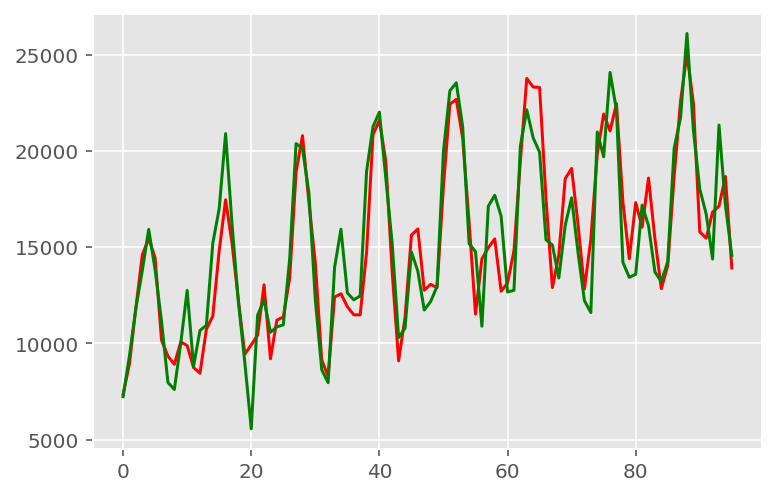

In [42]:
x5 = np.arange(0, 96, 1)
plt.plot(x5, predictions_all, color='red')
plt.plot(x5, y, color='green')

In [43]:
#Выделяем последние 12 месяцев
X_last = sales_4.drop('t', axis=1)
X_last_12 = X_last[84:]
X_last_12 = X_last_12.values

In [44]:
X_last_12.shape

(12, 12)

In [45]:
print(X_last_12)

[[12225. 11608. 20985. 19692. 24081. 22114. 14220. 13434. 13598. 17187.
  16119. 13713.]
 [11608. 20985. 19692. 24081. 22114. 14220. 13434. 13598. 17187. 16119.
  13713. 13210.]
 [20985. 19692. 24081. 22114. 14220. 13434. 13598. 17187. 16119. 13713.
  13210. 14251.]
 [19692. 24081. 22114. 14220. 13434. 13598. 17187. 16119. 13713. 13210.
  14251. 20139.]
 [24081. 22114. 14220. 13434. 13598. 17187. 16119. 13713. 13210. 14251.
  20139. 21725.]
 [22114. 14220. 13434. 13598. 17187. 16119. 13713. 13210. 14251. 20139.
  21725. 26099.]
 [14220. 13434. 13598. 17187. 16119. 13713. 13210. 14251. 20139. 21725.
  26099. 21084.]
 [13434. 13598. 17187. 16119. 13713. 13210. 14251. 20139. 21725. 26099.
  21084. 18024.]
 [13598. 17187. 16119. 13713. 13210. 14251. 20139. 21725. 26099. 21084.
  18024. 16722.]
 [17187. 16119. 13713. 13210. 14251. 20139. 21725. 26099. 21084. 18024.
  16722. 14385.]
 [16119. 13713. 13210. 14251. 20139. 21725. 26099. 21084. 18024. 16722.
  14385. 21342.]
 [13713. 13210. 14251

In [53]:
#делаем прогноз на 1 шаг вперед = лаг 1 год
predictions_new = model_fut.predict(X_last_12)
print(predictions_new)

[[12846.397]
 [14042.066]
 [18670.195]
 [22584.695]
 [25035.297]
 [22497.44 ]
 [15793.379]
 [15469.106]
 [16824.523]
 [17133.195]
 [18671.855]
 [13922.119]]


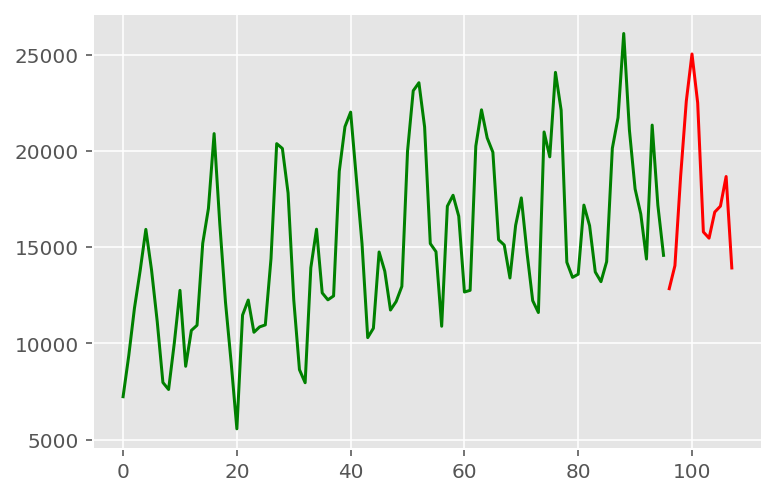

In [49]:
x5 = np.arange(0, 96, 1)
x6 = np.arange(96, 108, 1)
plt.plot(x6, predictions_new, color='red')
plt.plot(x5, y, color='green')